### Connect to database :

In [11]:
import pandas as pd
import psycopg2
from dotenv import load_dotenv
import os

# Load .env from current directory
load_dotenv('.env')

# Read env variables (use defaults or None if missing)
PG_USER = os.getenv('PG_USER')
PG_PASSWORD = os.getenv('PG_PASSWORD')
PG_HOST = os.getenv('PG_HOST', 'localhost')
PG_PORT = os.getenv('PG_PORT', '5432')
PG_DB = os.getenv('PG_DB')


try:
    # Connect to PostgreSQL
    conn = psycopg2.connect(
        dbname=PG_DB,
        user=PG_USER,
        password=PG_PASSWORD,
        host=PG_HOST,
        port=PG_PORT
    )

    # Example: load energy_consumption_hourly
    data = pd.read_sql('SELECT * FROM energy_consumption_hourly', conn)
    
    # Create a cursor to execute SQL
    cur = conn.cursor()
    
    # Run a simple query to test connection
    cur.execute("SELECT version();")
    version = cur.fetchone()
    print("Connection successful! PostgreSQL version:", version[0])
    
    # Close cursor and connection
    cur.close()
    conn.close()
    
except Exception as e:
    print("Connection failed:", e)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17308\790026072.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql('SELECT * FROM energy_consumption_hourly', conn)


Connection successful! PostgreSQL version: PostgreSQL 16.10 (Debian 16.10-1.pgdg13+1) on x86_64-pc-linux-gnu, compiled by gcc (Debian 14.2.0-19) 14.2.0, 64-bit


In [12]:
data

,time_ts,building,winter_flag,spring_flag,summer_flag,fall_flag,outdoor_temp_c,humidity_pct,cloud_cover_pct,solar_radiation_w_m2,...,day_of_week,month_num,day_of_year,is_weekend,is_holiday,is_peak_hour,lighting_kw,hvac_kw,special_equipment_kw,use_kw
0,2023-01-01 00:00:00,Hospital,1,0,0,0,-10.00,90.36,42.76,0.0,...,6,1,1,1,1,0,1.7337,2.9853,6.0873,10.8217
1,2023-01-01 01:00:00,Hospital,1,0,0,0,-10.00,90.90,50.11,0.0,...,6,1,1,1,1,0,1.6887,3.5390,6.3083,11.2541
2,2023-01-01 02:00:00,Hospital,1,0,0,0,-10.00,90.71,38.84,0.0,...,6,1,1,1,1,0,1.7212,3.6485,5.9951,11.4253
3,2023-01-01 03:00:00,Hospital,1,0,0,0,-9.81,90.44,34.33,0.0,...,6,1,1,1,1,0,1.6233,4.4524,6.0594,11.9859
4,2023-01-01 04:00:00,Hospital,1,0,0,0,-8.27,88.83,24.28,0.0,...,6,1,1,1,1,0,1.6414,4.9425,6.4094,12.8251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210235,2023-12-31 19:00:00,School,0,0,0,1,-9.86,91.83,17.57,0.0,...,6,12,365,1,1,1,0.2982,0.7246,1.8321,2.8872
210236,2023-12-31 20:00:00,School,0,0,0,1,-10.00,92.50,21.40,0.0,...,6,12,365,1,1,1,0.3055,0.6957,1.8719,2.9080
210237,2023-12-31 21:00:00,School,0,0,0,1,-10.00,92.80,19.89,0.0,...,6,12,365,1,1,0,0.3032,0.6749,1.8052,2.8309
210238,2023-12-31 22:00:00,School,0,0,0,1,-10.00,92.10,17.06,0.0,...,6,12,365,1,1,0,0.3050,0.7323,1.7872,2.7939


In [9]:
data.head(25)

,time_ts,building,winter_flag,spring_flag,summer_flag,fall_flag,outdoor_temp_c,humidity_pct,cloud_cover_pct,solar_radiation_w_m2,...,day_of_week,month_num,day_of_year,is_weekend,is_holiday,is_peak_hour,lighting_kw,hvac_kw,special_equipment_kw,use_kw
0,2023-01-01 00:00:00,Hospital,1,0,0,0,-10.00,90.36,42.76,0.00,...,6,1,1,1,1,0,1.7337,2.9853,6.0873,10.8217
1,2023-01-01 01:00:00,Hospital,1,0,0,0,-10.00,90.90,50.11,0.00,...,6,1,1,1,1,0,1.6887,3.5390,6.3083,11.2541
2,2023-01-01 02:00:00,Hospital,1,0,0,0,-10.00,90.71,38.84,0.00,...,6,1,1,1,1,0,1.7212,3.6485,5.9951,11.4253
3,2023-01-01 03:00:00,Hospital,1,0,0,0,-9.81,90.44,34.33,0.00,...,6,1,1,1,1,0,1.6233,4.4524,6.0594,11.9859
4,2023-01-01 04:00:00,Hospital,1,0,0,0,-8.27,88.83,24.28,0.00,...,6,1,1,1,1,0,1.6414,4.9425,6.4094,12.8251
5,2023-01-01 05:00:00,Hospital,1,0,0,0,-6.72,86.74,31.93,0.00,...,6,1,1,1,1,0,1.6832,5.2561,6.1072,12.9899
6,2023-01-01 06:00:00,Hospital,1,0,0,0,-4.88,84.83,38.07,0.00,...,6,1,1,1,1,0,2.2613,4.5759,7.4502,14.1383
7,2023-01-01 07:00:00,Hospital,1,0,0,0,-3.24,83.96,37.91,115.84,...,6,1,1,1,1,1,2.3834,5.4498,7.0511,14.8275
8,2023-01-01 08:00:00,Hospital,1,0,0,0,-1.51,79.74,30.31,240.45,...,6,1,1,1,1,1,2.2690,5.6314,7.5873,15.2230
9,2023-01-01 09:00:00,Hospital,1,0,0,0,0.33,77.74,28.81,344.70,...,6,1,1,1,1,1,2.2364,5.8138,7.3343,15.0989


# Scenario 1: Predict TOTAL energy (use_kw) from weather + time features

In [13]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning & Deep Learning
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Utilities
import pickle
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# Configuration parameters
LOOKBACK_HOURS = 24  # Use past 24 hours to predict next hour
TEST_SIZE = 0.20     # Last 20% for testing
VAL_SIZE = 0.20      # 20% of training data for validation
BATCH_SIZE = 64
EPOCHS = 100
LEARNING_RATE = 0.001

# Plotting configuration
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("=" * 60)
print("TIME SERIES ENERGY FORECASTING PIPELINE")
print("=" * 60)
print(f"✓ TensorFlow version: {tf.__version__}")
print(f"✓ Random seed set to: {RANDOM_SEED}")
print(f"✓ Lookback window: {LOOKBACK_HOURS} hours")
print(f"✓ Test set size: {TEST_SIZE * 100}%")
print(f"✓ Configuration loaded successfully")
print("=" * 60)

TIME SERIES ENERGY FORECASTING PIPELINE
✓ TensorFlow version: 2.20.0
✓ Random seed set to: 42
✓ Lookback window: 24 hours
✓ Test set size: 20.0%
✓ Configuration loaded successfully


In [15]:
"""
CELL 2: DATA PREPROCESSING
===========================
Convert time column to datetime, set as index, sort chronologically,
and perform basic data inspection.
"""

print("\n" + "=" * 60)
print("STEP 1: DATA PREPROCESSING")
print("=" * 60)

# Make a copy to avoid modifying the original
df = data.copy()

print(f"\n1. Initial dataset shape: {df.shape}")
print(f"   - Total records: {len(df):,}")
print(f"   - Total features: {df.shape[1]}")

# Convert time_ts to datetime if not already
if not pd.api.types.is_datetime64_any_dtype(df['time_ts']):
    print("\n2. Converting 'time_ts' to datetime...")
    df['time_ts'] = pd.to_datetime(df['time_ts'])
    print("   ✓ Conversion complete")
else:
    print("\n2. 'time_ts' already in datetime format ✓")

# Set time_ts as index
print("\n3. Setting 'time_ts' as index...")
df.set_index('time_ts', inplace=True)
print("   ✓ Index set successfully")

# Sort by time (critical for time series!)
print("\n4. Sorting data chronologically...")
df.sort_index(inplace=True)
print("   ✓ Data sorted by time")

# Basic inspection
print("\n5. Time series span:")
print(f"   - Start date: {df.index.min()}")
print(f"   - End date:   {df.index.max()}")
print(f"   - Duration:   {(df.index.max() - df.index.min()).days} days")

# Check for missing values
missing_counts = df.isnull().sum()
if missing_counts.sum() > 0:
    print("\n⚠ WARNING: Missing values detected!")
    print(missing_counts[missing_counts > 0])
    print("\n   Handling missing values via forward fill...")
    df.fillna(method='ffill', inplace=True)
    print("   ✓ Missing values filled")
else:
    print("\n✓ No missing values detected")

# # Check for duplicates
# duplicates = df.index.duplicated().sum()
# if duplicates > 0:
#     print(f"\n⚠ WARNING: {duplicates} duplicate timestamps found")
#     print("   Removing duplicates (keeping first occurrence)...")
#     df = df[~df.index.duplicated(keep='first')]
#     print("   ✓ Duplicates removed")
# else:
#     print("\n✓ No duplicate timestamps")

# Display basic statistics for target variable
print("\n6. Target variable (use_kw) statistics:")
print(df['use_kw'].describe())

print("\n7. Sample of preprocessed data:")
print(df.head(3))

print("\n" + "=" * 60)
print(f"✓ Preprocessing complete. Final shape: {df.shape}")
print("=" * 60)


STEP 1: DATA PREPROCESSING

1. Initial dataset shape: (210240, 21)
   - Total records: 210,240
   - Total features: 21

2. 'time_ts' already in datetime format ✓

3. Setting 'time_ts' as index...
   ✓ Index set successfully

4. Sorting data chronologically...
   ✓ Data sorted by time

5. Time series span:
   - Start date: 2023-01-01 00:00:00
   - End date:   2023-12-31 23:00:00
   - Duration:   364 days

✓ No missing values detected

6. Target variable (use_kw) statistics:
count    210240.000000
mean          5.263031
std           7.131727
min           0.557500
25%           1.281100
50%           1.856900
75%           4.365950
max          27.896500
Name: use_kw, dtype: float64

7. Sample of preprocessed data:
            building  winter_flag  spring_flag  summer_flag  fall_flag  \
time_ts                                                                  
2023-01-01  Hospital            1            0            0          0   
2023-01-01   Office2            1            0       

In [16]:
"""
CELL 3: FEATURE ENGINEERING
============================
One-hot encode the 'building' categorical column and prepare
the feature set for modeling.
"""

print("\n" + "=" * 60)
print("STEP 2: FEATURE ENGINEERING")
print("=" * 60)

# Check unique buildings
print("\n1. Building types in dataset:")
unique_buildings = df['building'].unique()
print(f"   - Unique buildings: {unique_buildings}")
print(f"   - Count: {len(unique_buildings)}")

# One-hot encode 'building' column
if len(unique_buildings) > 1:
    print("\n2. One-hot encoding 'building' column...")
    building_dummies = pd.get_dummies(df['building'], prefix='building', drop_first=False)
    print(f"   ✓ Created {building_dummies.shape[1]} dummy variables:")
    print(f"   {list(building_dummies.columns)}")
    
    # Drop original 'building' column and concatenate dummies
    df = df.drop('building', axis=1)
    df = pd.concat([df, building_dummies], axis=1)
    print(f"   ✓ Building encoded. New shape: {df.shape}")
else:
    print("\n2. Only one building type found - no encoding needed")
    print("   Dropping 'building' column...")
    df = df.drop('building', axis=1)

# Display the columns after encoding
print("\n3. All columns after feature engineering:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i:2d}. {col}")

# Verify no object-type columns remain
object_cols = df.select_dtypes(include=['object']).columns
if len(object_cols) > 0:
    print(f"\n⚠ WARNING: Object-type columns still present: {list(object_cols)}")
else:
    print("\n✓ All columns are numeric - ready for modeling")

# Display correlation with target variable
print("\n4. Top 10 features correlated with 'use_kw':")
correlations = df.corr()['use_kw'].abs().sort_values(ascending=False)
print(correlations.head(11))  # Top 10 + target itself

print("\n" + "=" * 60)
print(f"✓ Feature engineering complete. Shape: {df.shape}")
print("=" * 60)


STEP 2: FEATURE ENGINEERING

1. Building types in dataset:
   - Unique buildings: ['Hospital' 'Office2' 'Office1' 'House1' 'Industry3' 'Industry2'
 'Industry1' 'House15' 'House14' 'School' 'Office3' 'House2' 'House12'
 'House11' 'House3' 'House10' 'House9' 'House8' 'House7' 'House6' 'House4'
 'House13' 'Office4' 'House5']
   - Count: 24

2. One-hot encoding 'building' column...
   ✓ Created 24 dummy variables:
   ['building_Hospital', 'building_House1', 'building_House10', 'building_House11', 'building_House12', 'building_House13', 'building_House14', 'building_House15', 'building_House2', 'building_House3', 'building_House4', 'building_House5', 'building_House6', 'building_House7', 'building_House8', 'building_House9', 'building_Industry1', 'building_Industry2', 'building_Industry3', 'building_Office1', 'building_Office2', 'building_Office3', 'building_Office4', 'building_School']
   ✓ Building encoded. New shape: (210240, 43)

3. All columns after feature engineering:
    1. winter_

In [17]:
"""
CELL 4: FEATURE SELECTION & TIME-BASED SPLIT
=============================================
Separate features from target and perform time-based train/test split.
NO SHUFFLING - maintains temporal order.
"""

print("\n" + "=" * 60)
print("STEP 3: FEATURE SELECTION & TIME-BASED SPLIT")
print("=" * 60)

# Separate target from features
print("\n1. Separating features and target...")
target_col = 'use_kw'

# All columns except target are features
feature_cols = [col for col in df.columns if col != target_col]

X = df[feature_cols].values
y = df[target_col].values

print(f"   ✓ Features shape: {X.shape}")
print(f"   ✓ Target shape: {y.shape}")
print(f"   ✓ Number of features: {len(feature_cols)}")

# Store feature names for later use
feature_names = feature_cols

# Calculate split indices (time-based, no shuffling)
print(f"\n2. Performing time-based split (last {TEST_SIZE*100}% as test)...")
n_samples = len(df)
test_size = int(n_samples * TEST_SIZE)
train_val_size = n_samples - test_size

# Further split training data into train and validation
val_size = int(train_val_size * VAL_SIZE)
train_size = train_val_size - val_size

# Split the data
X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size:train_val_size]
y_val = y[train_size:train_val_size]

X_test = X[train_val_size:]
y_test = y[train_val_size:]

# Get corresponding timestamps for reference
train_dates = df.index[:train_size]
val_dates = df.index[train_size:train_val_size]
test_dates = df.index[train_val_size:]

# Display split information
print("\n3. Split summary:")
print(f"   {'Set':<12} {'Samples':<10} {'Percentage':<12} {'Date Range'}")
print(f"   {'-'*70}")
print(f"   {'Training':<12} {len(X_train):<10,} {len(X_train)/n_samples*100:>6.1f}%      "
      f"{train_dates.min().date()} to {train_dates.max().date()}")
print(f"   {'Validation':<12} {len(X_val):<10,} {len(X_val)/n_samples*100:>6.1f}%      "
      f"{val_dates.min().date()} to {val_dates.max().date()}")
print(f"   {'Test':<12} {len(X_test):<10,} {len(X_test)/n_samples*100:>6.1f}%      "
      f"{test_dates.min().date()} to {test_dates.max().date()}")
print(f"   {'-'*70}")
print(f"   {'Total':<12} {n_samples:<10,} {100.0:>6.1f}%")

# Display target statistics for each set
print("\n4. Target variable (use_kw) statistics by set:")
print(f"   {'Set':<12} {'Min':<10} {'Mean':<10} {'Max':<10} {'Std':<10}")
print(f"   {'-'*60}")
print(f"   {'Training':<12} {y_train.min():<10.2f} {y_train.mean():<10.2f} "
      f"{y_train.max():<10.2f} {y_train.std():<10.2f}")
print(f"   {'Validation':<12} {y_val.min():<10.2f} {y_val.mean():<10.2f} "
      f"{y_val.max():<10.2f} {y_val.std():<10.2f}")
print(f"   {'Test':<12} {y_test.min():<10.2f} {y_test.mean():<10.2f} "
      f"{y_test.max():<10.2f} {y_test.std():<10.2f}")

print("\n" + "=" * 60)
print("✓ Feature selection and time-based split complete")
print("=" * 60)


STEP 3: FEATURE SELECTION & TIME-BASED SPLIT

1. Separating features and target...
   ✓ Features shape: (210240, 42)
   ✓ Target shape: (210240,)
   ✓ Number of features: 42

2. Performing time-based split (last 20.0% as test)...

3. Split summary:
   Set          Samples    Percentage   Date Range
   ----------------------------------------------------------------------
   Training     134,554      64.0%      2023-01-01 to 2023-08-22
   Validation   33,638       16.0%      2023-08-22 to 2023-10-19
   Test         42,048       20.0%      2023-10-20 to 2023-12-31
   ----------------------------------------------------------------------
   Total        210,240     100.0%

4. Target variable (use_kw) statistics by set:
   Set          Min        Mean       Max        Std       
   ------------------------------------------------------------
   Training     0.56       5.35       27.90      7.16      
   Validation   0.58       4.99       26.73      6.88      
   Test         0.56       5.

In [18]:
"""
CELL 5: FEATURE SCALING
========================
Standardize features using StandardScaler.
Fit on training data only to prevent data leakage.
"""

print("\n" + "=" * 60)
print("STEP 4: FEATURE SCALING")
print("=" * 60)

# Initialize scalers
print("\n1. Initializing StandardScaler for features...")
feature_scaler = StandardScaler()

# Fit scaler on training data only (prevent data leakage!)
print("   Fitting scaler on training data...")
X_train_scaled = feature_scaler.fit_transform(X_train)
print("   ✓ Scaler fitted on training data")

# Transform validation and test sets using the same scaler
print("\n2. Transforming validation and test sets...")
X_val_scaled = feature_scaler.transform(X_val)
X_test_scaled = feature_scaler.transform(X_test)
print("   ✓ All sets scaled")

# Scale target variable separately
print("\n3. Scaling target variable (use_kw)...")
target_scaler = StandardScaler()
y_train_scaled = target_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_val_scaled = target_scaler.transform(y_val.reshape(-1, 1)).flatten()
y_test_scaled = target_scaler.transform(y_test.reshape(-1, 1)).flatten()
print("   ✓ Target variable scaled")

# Display scaling statistics
print("\n4. Feature scaling statistics:")
print(f"   Feature mean (training): {X_train_scaled.mean():.6f}")
print(f"   Feature std (training):  {X_train_scaled.std():.6f}")
print(f"   Target mean (training):  {y_train_scaled.mean():.6f}")
print(f"   Target std (training):   {y_train_scaled.std():.6f}")

# Check for any NaN or Inf values after scaling
if np.isnan(X_train_scaled).any() or np.isinf(X_train_scaled).any():
    print("\n⚠ WARNING: NaN or Inf values detected after scaling!")
else:
    print("\n✓ No NaN or Inf values in scaled data")

# Display sample of scaled vs unscaled data
print("\n5. Sample comparison (first feature, first 3 samples):")
print(f"   Original:    {X_train[:3, 0]}")
print(f"   Scaled:      {X_train_scaled[:3, 0]}")

# Store scalers for later use (inference)
print("\n6. Storing scalers for later use...")
scalers = {
    'feature_scaler': feature_scaler,
    'target_scaler': target_scaler,
    'feature_names': feature_names
}
print("   ✓ Scalers stored in 'scalers' dictionary")

print("\n" + "=" * 60)
print("✓ Feature scaling complete")
print("=" * 60)


STEP 4: FEATURE SCALING

1. Initializing StandardScaler for features...
   Fitting scaler on training data...
   ✓ Scaler fitted on training data

2. Transforming validation and test sets...
   ✓ All sets scaled

3. Scaling target variable (use_kw)...
   ✓ Target variable scaled

4. Feature scaling statistics:
   Feature mean (training): 0.000000
   Feature std (training):  0.988024
   Target mean (training):  0.000000
   Target std (training):   1.000000

✓ No NaN or Inf values in scaled data

5. Sample comparison (first feature, first 3 samples):
   Original:    [1 1 1]
   Scaled:      [1.24900265 1.24900265 1.24900265]

6. Storing scalers for later use...
   ✓ Scalers stored in 'scalers' dictionary

✓ Feature scaling complete


In [19]:
"""
CELL 6: SLIDING WINDOW CREATION
================================
Create sequences for supervised learning using a sliding window approach.
For each sample, use LOOKBACK_HOURS to predict the next hour.
"""

print("\n" + "=" * 60)
print("STEP 5: SLIDING WINDOW SEQUENCE CREATION")
print("=" * 60)

def create_sequences(X, y, lookback):
    """
    Create sliding window sequences for time series forecasting.
    
    Args:
        X: Feature array (samples, features)
        y: Target array (samples,)
        lookback: Number of time steps to look back
    
    Returns:
        X_seq: Sequence array (samples, lookback, features)
        y_seq: Target array (samples,)
    """
    X_seq, y_seq = [], []
    
    for i in range(lookback, len(X)):
        # Take lookback hours of features
        X_seq.append(X[i-lookback:i])
        # Target is the next hour's energy consumption
        y_seq.append(y[i])
    
    return np.array(X_seq), np.array(y_seq)

# Create sequences for training set
print(f"\n1. Creating sequences with lookback = {LOOKBACK_HOURS} hours...")
print("\n   Processing training set...")
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, LOOKBACK_HOURS)
print(f"   ✓ Training sequences: {X_train_seq.shape}")

# Create sequences for validation set
print("\n   Processing validation set...")
X_val_seq, y_val_seq = create_sequences(X_val_scaled, y_val_scaled, LOOKBACK_HOURS)
print(f"   ✓ Validation sequences: {X_val_seq.shape}")

# Create sequences for test set
print("\n   Processing test set...")
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, LOOKBACK_HOURS)
print(f"   ✓ Test sequences: {X_test_seq.shape}")

# Display shape information
print("\n2. Sequence shape breakdown:")
print(f"   X shape: (samples, timesteps, features)")
print(f"   y shape: (samples,)")
print()
print(f"   {'Set':<12} {'X Shape':<25} {'y Shape':<15}")
print(f"   {'-'*60}")
print(f"   {'Training':<12} {str(X_train_seq.shape):<25} {str(y_train_seq.shape):<15}")
print(f"   {'Validation':<12} {str(X_val_seq.shape):<25} {str(y_val_seq.shape):<15}")
print(f"   {'Test':<12} {str(X_test_seq.shape):<25} {str(y_test_seq.shape):<15}")

# Calculate samples lost due to lookback
print("\n3. Samples lost due to lookback window:")
print(f"   Training:   {len(X_train) - len(X_train_seq)} samples")
print(f"   Validation: {len(X_val) - len(X_val_seq)} samples")
print(f"   Test:       {len(X_test) - len(X_test_seq)} samples")

# Display example of one sequence
print("\n4. Example of one training sequence:")
print(f"   Input:  Past {LOOKBACK_HOURS} hours of {X_train_seq.shape[2]} features")
print(f"   Shape:  {X_train_seq[0].shape}")
print(f"   Output: Next hour's energy consumption (use_kw)")
print(f"   Value:  {y_train_seq[0]:.4f} (scaled)")

# Memory usage estimate
memory_mb = (X_train_seq.nbytes + X_val_seq.nbytes + X_test_seq.nbytes) / (1024**2)
print(f"\n5. Total memory usage for sequences: {memory_mb:.2f} MB")

print("\n" + "=" * 60)
print("✓ Sliding window sequences created successfully")
print("=" * 60)


STEP 5: SLIDING WINDOW SEQUENCE CREATION

1. Creating sequences with lookback = 24 hours...

   Processing training set...
   ✓ Training sequences: (134530, 24, 42)

   Processing validation set...
   ✓ Validation sequences: (33614, 24, 42)

   Processing test set...
   ✓ Test sequences: (42024, 24, 42)

2. Sequence shape breakdown:
   X shape: (samples, timesteps, features)
   y shape: (samples,)

   Set          X Shape                   y Shape        
   ------------------------------------------------------------
   Training     (134530, 24, 42)          (134530,)      
   Validation   (33614, 24, 42)           (33614,)       
   Test         (42024, 24, 42)           (42024,)       

3. Samples lost due to lookback window:
   Training:   24 samples
   Validation: 24 samples
   Test:       24 samples

4. Example of one training sequence:
   Input:  Past 24 hours of 42 features
   Shape:  (24, 42)
   Output: Next hour's energy consumption (use_kw)
   Value:  0.8254 (scaled)

5. To

In [20]:
"""
CELL 7: MODEL ARCHITECTURE DEFINITION
======================================
Define LSTM and GRU model architectures for time series forecasting.
Both models will be trained and compared.
"""

print("\n" + "=" * 60)
print("STEP 6: MODEL ARCHITECTURE DEFINITION")
print("=" * 60)

def build_lstm_model(input_shape, learning_rate=LEARNING_RATE):
    """
    Build LSTM model for time series forecasting.
    
    Args:
        input_shape: Tuple (timesteps, features)
        learning_rate: Learning rate for optimizer
    
    Returns:
        Compiled Keras model
    """
    model = Sequential([
        # First LSTM layer with return sequences
        LSTM(128, activation='tanh', return_sequences=True, 
             input_shape=input_shape, name='lstm_1'),
        Dropout(0.2, name='dropout_1'),
        
        # Second LSTM layer
        LSTM(64, activation='tanh', return_sequences=False, name='lstm_2'),
        Dropout(0.2, name='dropout_2'),
        
        # Dense layers
        Dense(32, activation='relu', name='dense_1'),
        Dropout(0.1, name='dropout_3'),
        
        # Output layer
        Dense(1, name='output')
    ], name='LSTM_Model')
    
    # Compile model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss='mse',
        metrics=['mae', 'mape']
    )
    
    return model

def build_gru_model(input_shape, learning_rate=LEARNING_RATE):
    """
    Build GRU model for time series forecasting.
    GRU is typically faster than LSTM with comparable performance.
    
    Args:
        input_shape: Tuple (timesteps, features)
        learning_rate: Learning rate for optimizer
    
    Returns:
        Compiled Keras model
    """
    model = Sequential([
        # First GRU layer with return sequences
        GRU(128, activation='tanh', return_sequences=True,
            input_shape=input_shape, name='gru_1'),
        Dropout(0.2, name='dropout_1'),
        
        # Second GRU layer
        GRU(64, activation='tanh', return_sequences=False, name='gru_2'),
        Dropout(0.2, name='dropout_2'),
        
        # Dense layers
        Dense(32, activation='relu', name='dense_1'),
        Dropout(0.1, name='dropout_3'),
        
        # Output layer
        Dense(1, name='output')
    ], name='GRU_Model')
    
    # Compile model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss='mse',
        metrics=['mae', 'mape']
    )
    
    return model

# Get input shape from the sequences
input_shape = (X_train_seq.shape[1], X_train_seq.shape[2])
print(f"\n1. Input shape for models: {input_shape}")
print(f"   - Timesteps: {input_shape[0]} hours")
print(f"   - Features:  {input_shape[1]}")

# Build both models
print("\n2. Building LSTM model...")
lstm_model = build_lstm_model(input_shape)
print("   ✓ LSTM model built")

print("\n3. Building GRU model...")
gru_model = build_gru_model(input_shape)
print("   ✓ GRU model built")

# Display model summaries
print("\n" + "="*60)
print("LSTM MODEL ARCHITECTURE")
print("="*60)
lstm_model.summary()

print("\n" + "="*60)
print("GRU MODEL ARCHITECTURE")
print("="*60)
gru_model.summary()

# Count parameters
lstm_params = lstm_model.count_params()
gru_params = gru_model.count_params()

print("\n4. Model comparison:")
print(f"   {'Model':<10} {'Parameters':<15} {'Relative Size'}")
print(f"   {'-'*50}")
print(f"   {'LSTM':<10} {lstm_params:>12,}   100%")
print(f"   {'GRU':<10} {gru_params:>12,}   {gru_params/lstm_params*100:>5.1f}%")

print("\n" + "=" * 60)
print("✓ Model architectures defined successfully")
print("=" * 60)


STEP 6: MODEL ARCHITECTURE DEFINITION

1. Input shape for models: (24, 42)
   - Timesteps: 24 hours
   - Features:  42

2. Building LSTM model...
   ✓ LSTM model built

3. Building GRU model...
   ✓ GRU model built

LSTM MODEL ARCHITECTURE


Model: "LSTM_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 24, 128)        │        87,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 24, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139,073 (543.25 KB)

 Trainable params: 139,073 (543.25 KB)

 Non-trainable params: 0 (0.00 B)


GRU MODEL ARCHITECTURE


Model: "GRU_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                     │ (None, 24, 128)        │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 24, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,409 (411.75 KB)

 Trainable params: 105,409 (411.75 KB)

 Non-trainable params: 0 (0.00 B)


4. Model comparison:
   Model      Parameters      Relative Size
   --------------------------------------------------
   LSTM            139,073   100%
   GRU             105,409    75.8%

✓ Model architectures defined successfully



STEP 7: MODEL TRAINING

1. Training callbacks configured:
   ✓ Early stopping (patience=15)
   ✓ Learning rate reduction (patience=5)
   ✓ Model checkpointing

TRAINING LSTM MODEL
Epoch 1/100
2103/2103 ━━━━━━━━━━━━━━━━━━━━ 66s 30ms/step - loss: 0.9743 - mae: 0.7209 - mape: 146.1147 - val_loss: 0.8975 - val_mae: 0.6995 - val_mape: 999.3606 - learning_rate: 0.0010
Epoch 2/100
2103/2103 ━━━━━━━━━━━━━━━━━━━━ 44s 21ms/step - loss: 0.9669 - mae: 0.7168 - mape: 150.2668 - val_loss: 0.8966 - val_mae: 0.6892 - val_mape: 1265.2363 - learning_rate: 0.0010
Epoch 3/100
2103/2103 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - loss: 0.9638 - mae: 0.7154 - mape: 148.0077 - val_loss: 0.8976 - val_mae: 0.6898 - val_mape: 1449.5911 - learning_rate: 0.0010
Epoch 4/100
2103/2103 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - loss: 0.9603 - mae: 0.7132 - mape: 144.8557 - val_loss: 0.8987 - val_mae: 0.6786 - val_mape: 1606.3439 - learning_rate: 0.0010
Epoch 5/100
2103/2103 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - loss: 0.9547 - ma

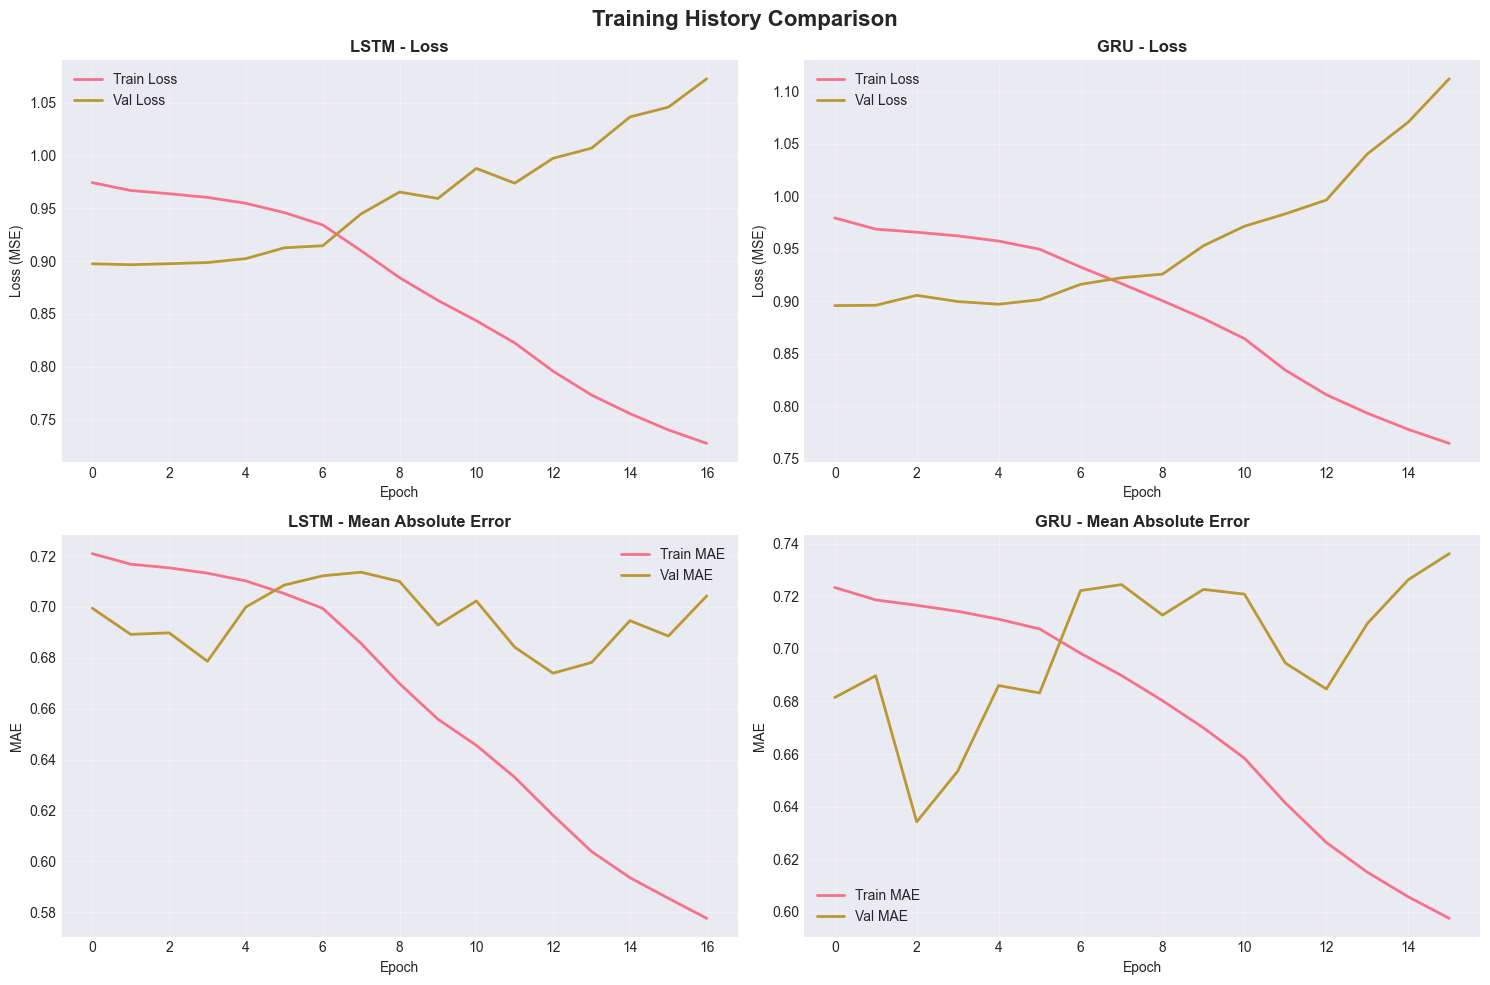


TRAINING SUMMARY

LSTM Model:
   Epochs trained: 17
   Final train loss: 0.727531
   Final val loss:   1.072622
   Best val loss:    0.896597

GRU Model:
   Epochs trained: 16
   Final train loss: 0.764814
   Final val loss:   1.111713
   Best val loss:    0.895894

✓ Model training complete


In [ ]:
"""
CELL 8: MODEL TRAINING WITH CALLBACKS
======================================
Train both LSTM and GRU models with early stopping, learning rate reduction,
and model checkpointing.
"""

print("\n" + "=" * 60)
print("STEP 7: MODEL TRAINING")
print("=" * 60)

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

# Checkpoint for LSTM
lstm_checkpoint = ModelCheckpoint(
    'best_lstm_model.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=0
)

# Checkpoint for GRU
gru_checkpoint = ModelCheckpoint(
    'best_gru_model.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=0
)

print("\n1. Training callbacks configured:")
print("   ✓ Early stopping (patience=15)")
print("   ✓ Learning rate reduction (patience=5)")
print("   ✓ Model checkpointing")

# Train LSTM model
print("\n" + "="*60)
print("TRAINING LSTM MODEL")
print("="*60)

lstm_history = lstm_model.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_val_seq, y_val_seq),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stopping, reduce_lr, lstm_checkpoint],
    verbose=1,
    shuffle=False  # Don't shuffle time series data!
)

print("\n✓ LSTM training complete")

# Train GRU model
print("\n" + "="*60)
print("TRAINING GRU MODEL")
print("="*60)

gru_history = gru_model.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_val_seq, y_val_seq),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stopping, reduce_lr, gru_checkpoint],
    verbose=1,
    shuffle=False  # Don't shuffle time series data!
)

print("\n✓ GRU training complete")

# Plot training history
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Training History Comparison', fontsize=16, fontweight='bold')

# LSTM Loss
axes[0, 0].plot(lstm_history.history['loss'], label='Train Loss', linewidth=2)
axes[0, 0].plot(lstm_history.history['val_loss'], label='Val Loss', linewidth=2)
axes[0, 0].set_title('LSTM - Loss', fontweight='bold')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss (MSE)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# GRU Loss
axes[0, 1].plot(gru_history.history['loss'], label='Train Loss', linewidth=2)
axes[0, 1].plot(gru_history.history['val_loss'], label='Val Loss', linewidth=2)
axes[0, 1].set_title('GRU - Loss', fontweight='bold')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss (MSE)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# LSTM MAE
axes[1, 0].plot(lstm_history.history['mae'], label='Train MAE', linewidth=2)
axes[1, 0].plot(lstm_history.history['val_mae'], label='Val MAE', linewidth=2)
axes[1, 0].set_title('LSTM - Mean Absolute Error', fontweight='bold')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# GRU MAE
axes[1, 1].plot(gru_history.history['mae'], label='Train MAE', linewidth=2)
axes[1, 1].plot(gru_history.history['val_mae'], label='Val MAE', linewidth=2)
axes[1, 1].set_title('GRU - Mean Absolute Error', fontweight='bold')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('MAE')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary of training
print("\n" + "="*60)
print("TRAINING SUMMARY")
print("="*60)

print("\nLSTM Model:")
print(f"   Epochs trained: {len(lstm_history.history['loss'])}")
print(f"   Final train loss: {lstm_history.history['loss'][-1]:.6f}")
print(f"   Final val loss:   {lstm_history.history['val_loss'][-1]:.6f}")
print(f"   Best val loss:    {min(lstm_history.history['val_loss']):.6f}")

print("\nGRU Model:")
print(f"   Epochs trained: {len(gru_history.history['loss'])}")
print(f"   Final train loss: {gru_history.history['loss'][-1]:.6f}")
print(f"   Final val loss:   {gru_history.history['val_loss'][-1]:.6f}")
print(f"   Best val loss:    {min(gru_history.history['val_loss']):.6f}")

print("\n" + "=" * 60)
print("✓ Model training complete")
print("=" * 60)

In [22]:
"""
CELL 9: MODEL EVALUATION WITH CONFIDENCE INTERVALS
===================================================
Evaluate both models using RMSE and MAPE metrics.
Calculate prediction confidence intervals based on residuals.
"""

print("\n" + "=" * 60)
print("STEP 8: MODEL EVALUATION WITH CONFIDENCE INTERVALS")
print("=" * 60)

def calculate_metrics(y_true, y_pred, model_name="Model"):
    """Calculate regression metrics."""
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    
    # R-squared
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    
    return {
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape,
        'R2': r2
    }

def calculate_confidence_intervals(y_true, y_pred, confidence=0.95):
    """
    Calculate prediction confidence intervals based on residuals.
    
    Args:
        y_true: True values
        y_pred: Predicted values
        confidence: Confidence level (default 0.95 for 95% CI)
    
    Returns:
        Dictionary with lower and upper bounds
    """
    residuals = y_true - y_pred
    
    # Calculate percentiles for confidence interval
    alpha = 1 - confidence
    lower_percentile = (alpha / 2) * 100
    upper_percentile = (1 - alpha / 2) * 100
    
    lower_bound = np.percentile(residuals, lower_percentile)
    upper_bound = np.percentile(residuals, upper_percentile)
    
    # Calculate prediction intervals
    pred_lower = y_pred + lower_bound
    pred_upper = y_pred + upper_bound
    
    return {
        'lower_bound': pred_lower,
        'upper_bound': pred_upper,
        'residual_std': np.std(residuals),
        'residual_mean': np.mean(residuals)
    }

# Make predictions on test set
print("\n1. Making predictions on test set...")

# LSTM predictions
y_pred_lstm_scaled = lstm_model.predict(X_test_seq, verbose=0).flatten()
y_pred_lstm = target_scaler.inverse_transform(y_pred_lstm_scaled.reshape(-1, 1)).flatten()

# GRU predictions
y_pred_gru_scaled = gru_model.predict(X_test_seq, verbose=0).flatten()
y_pred_gru = target_scaler.inverse_transform(y_pred_gru_scaled.reshape(-1, 1)).flatten()

# Inverse transform test targets
y_test_actual = target_scaler.inverse_transform(y_test_seq.reshape(-1, 1)).flatten()

print("   ✓ Predictions generated")

# Calculate metrics
print("\n2. Calculating performance metrics...")
lstm_metrics = calculate_metrics(y_test_actual, y_pred_lstm, "LSTM")
gru_metrics = calculate_metrics(y_test_actual, y_pred_gru, "GRU")

# Display metrics
print("\n" + "="*60)
print("TEST SET PERFORMANCE METRICS")
print("="*60)
print(f"\n{'Metric':<15} {'LSTM':<15} {'GRU':<15} {'Better'}")
print("-"*60)
print(f"{'RMSE (kW)':<15} {lstm_metrics['RMSE']:<15.4f} {gru_metrics['RMSE']:<15.4f} "
      f"{'GRU' if gru_metrics['RMSE'] < lstm_metrics['RMSE'] else 'LSTM'}")
print(f"{'MAE (kW)':<15} {lstm_metrics['MAE']:<15.4f} {gru_metrics['MAE']:<15.4f} "
      f"{'GRU' if gru_metrics['MAE'] < lstm_metrics['MAE'] else 'LSTM'}")
print(f"{'MAPE (%)':<15} {lstm_metrics['MAPE']:<15.2f} {gru_metrics['MAPE']:<15.2f} "
      f"{'GRU' if gru_metrics['MAPE'] < lstm_metrics['MAPE'] else 'LSTM'}")
print(f"{'R² Score':<15} {lstm_metrics['R2']:<15.4f} {gru_metrics['R2']:<15.4f} "
      f"{'GRU' if gru_metrics['R2'] > lstm_metrics['R2'] else 'LSTM'}")

# Select best model based on RMSE
if gru_metrics['RMSE'] < lstm_metrics['RMSE']:
    best_model = gru_model
    best_model_name = 'GRU'
    best_predictions = y_pred_gru
    best_metrics = gru_metrics
else:
    best_model = lstm_model
    best_model_name = 'LSTM'
    best_predictions = y_pred_lstm
    best_metrics = lstm_metrics

print(f"\n✓ Best model: {best_model_name}")

# Calculate 95% confidence intervals
print("\n3. Calculating 95% prediction confidence intervals...")
confidence_intervals = calculate_confidence_intervals(y_test_actual, best_predictions, confidence=0.95)

print(f"\n   Residual statistics:")
print(f"   - Mean residual: {confidence_intervals['residual_mean']:.4f} kW")
print(f"   - Std residual:  {confidence_intervals['residual_std']:.4f} kW")

# Define physical bounds for hospital energy consumption
print("\n4. Defining physical bounds based on data...")
# Use historical min/max with some buffer
physical_min = df['use_kw'].min() * 0.8  # 20% buffer below min
physical_max = df['use_kw'].max() * 1.2  # 20% buffer above max

print(f"   - Physical minimum: {physical_min:.2f} kW")
print(f"   - Physical maximum: {physical_max:.2f} kW")

# Apply physical constraints to confidence intervals
pred_lower_constrained = np.maximum(confidence_intervals['lower_bound'], physical_min)
pred_upper_constrained = np.minimum(confidence_intervals['upper_bound'], physical_max)

# Calculate coverage (% of actual values within confidence interval)
within_interval = np.sum((y_test_actual >= pred_lower_constrained) & 
                         (y_test_actual <= pred_upper_constrained))
coverage = within_interval / len(y_test_actual) * 100

print(f"\n5. Confidence interval performance:")
print(f"   - Target coverage: 95%")
print(f"   - Actual coverage: {coverage:.2f}%")
print(f"   - Average interval width: {np.mean(pred_upper_constrained - pred_lower_constrained):.2f} kW")

# Store predictions and intervals for visualization
predictions_df = pd.DataFrame({
    'timestamp': test_dates[LOOKBACK_HOURS:],
    'actual': y_test_actual,
    'predicted': best_predictions,
    'lower_95': pred_lower_constrained,
    'upper_95': pred_upper_constrained,
    'residual': y_test_actual - best_predictions
})

print("\n" + "=" * 60)
print("✓ Model evaluation complete")
print("=" * 60)


STEP 8: MODEL EVALUATION WITH CONFIDENCE INTERVALS

1. Making predictions on test set...
   ✓ Predictions generated

2. Calculating performance metrics...

TEST SET PERFORMANCE METRICS

Metric          LSTM            GRU             Better
------------------------------------------------------------
RMSE (kW)       7.1489          7.2006          LSTM
MAE (kW)        4.9479          4.7460          GRU
MAPE (%)        206.84          184.96          GRU
R² Score        0.0257          0.0116          LSTM

✓ Best model: LSTM

3. Calculating 95% prediction confidence intervals...

   Residual statistics:
   - Mean residual: 0.4656 kW
   - Std residual:  7.1337 kW

4. Defining physical bounds based on data...
   - Physical minimum: 0.45 kW
   - Physical maximum: 33.48 kW

5. Confidence interval performance:
   - Target coverage: 95%
   - Actual coverage: 95.00%
   - Average interval width: 23.28 kW

✓ Model evaluation complete



STEP 9: VISUALIZATION


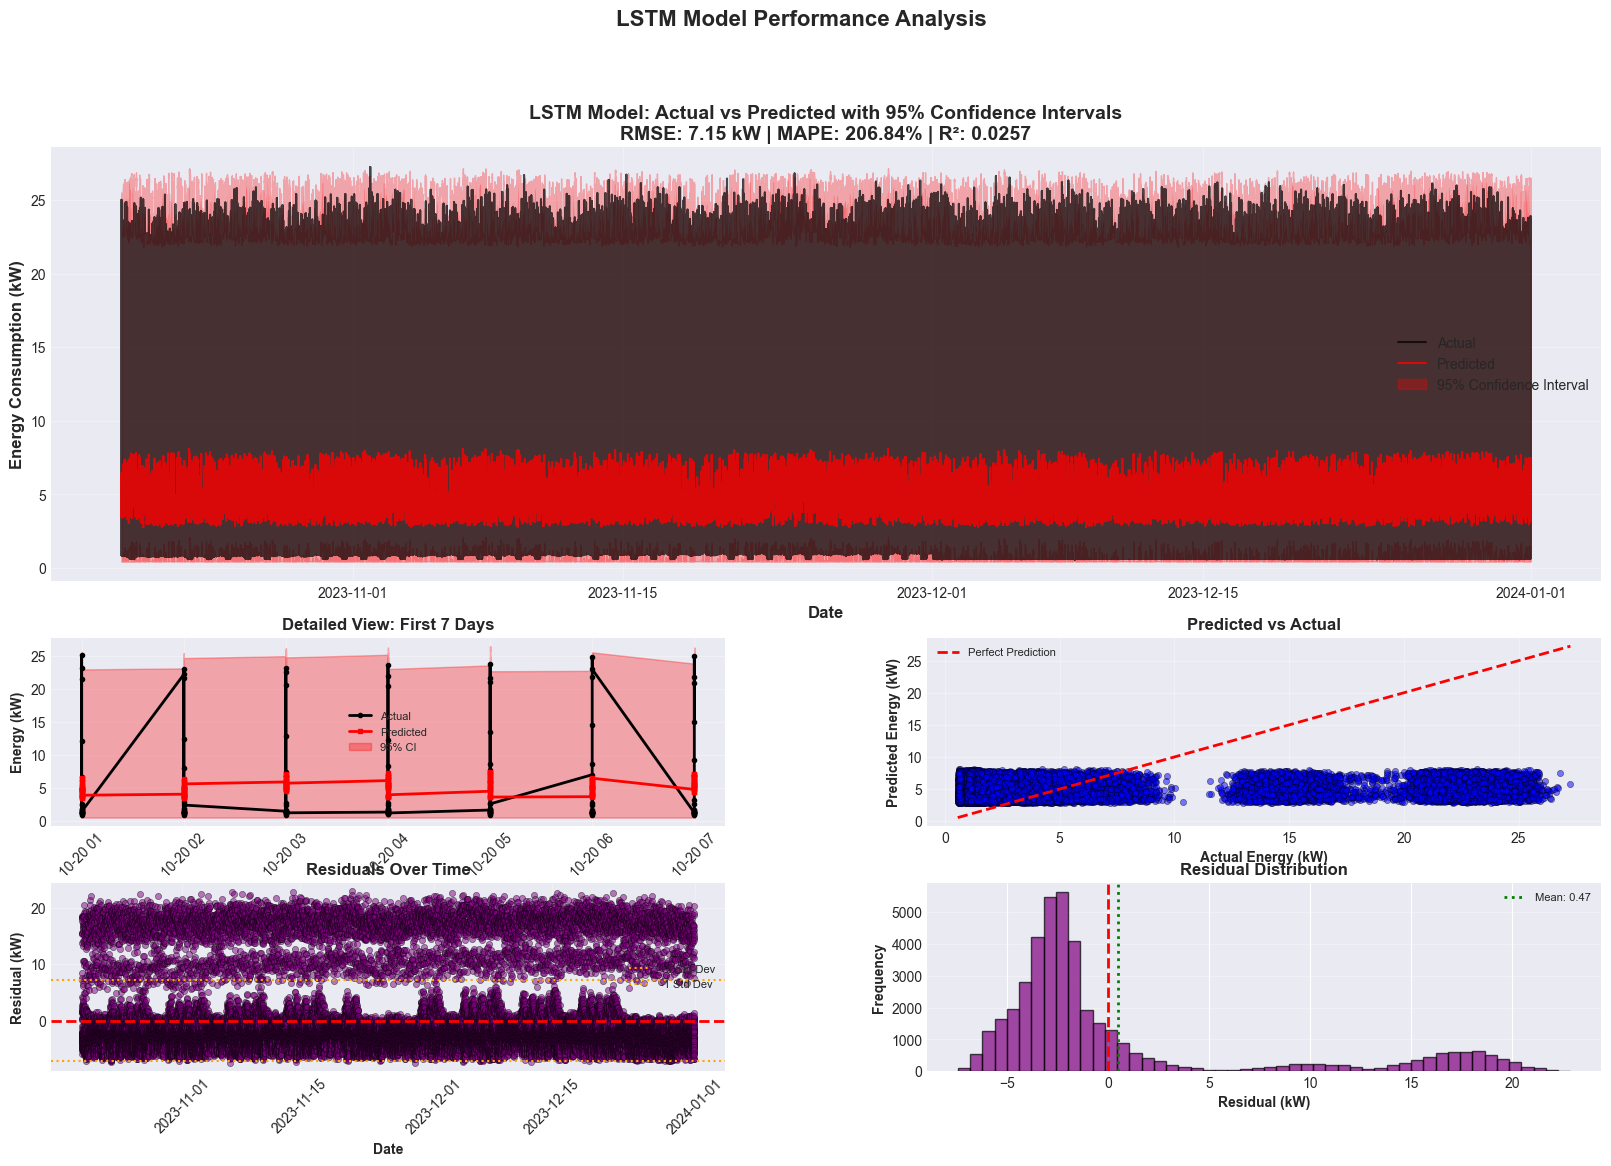


1. Error analysis by time of day...

   Average error by hour:
     residual       actual
         mean   std   mean
hour                      
0        0.47  7.17   5.16
1        0.57  7.13   5.20
2        0.42  7.10   5.21
3        0.59  7.07   5.22
4        0.56  7.09   5.24
5        0.47  7.08   5.24
6        0.66  7.24   5.27
7        0.64  7.27   5.31
8        0.40  7.23   5.33
9        0.70  7.20   5.33


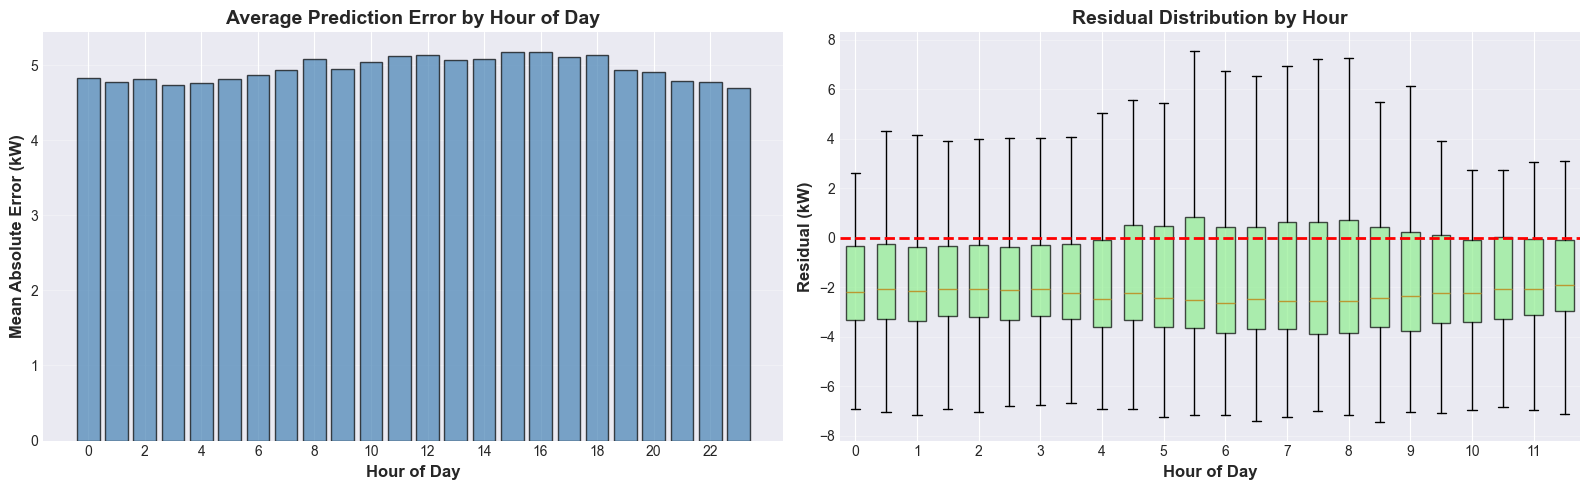


2. Prediction interval statistics:
   - Mean interval width: 23.28 kW
   - Median interval width: 23.09 kW
   - Min interval width: 21.39 kW
   - Max interval width: 25.06 kW

✓ Visualization complete


In [23]:
"""
CELL 10: VISUALIZATION WITH CONFIDENCE INTERVALS
=================================================
Create comprehensive visualizations including actual vs predicted values
with 95% confidence intervals.
"""

print("\n" + "=" * 60)
print("STEP 9: VISUALIZATION")
print("=" * 60)

# Create comprehensive visualization
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(4, 2, hspace=0.3, wspace=0.3)

# 1. Full test set with confidence intervals
ax1 = fig.add_subplot(gs[0:2, :])
ax1.plot(predictions_df['timestamp'], predictions_df['actual'], 
         label='Actual', color='black', linewidth=1.5, alpha=0.7)
ax1.plot(predictions_df['timestamp'], predictions_df['predicted'], 
         label='Predicted', color='red', linewidth=1.5, alpha=0.8)
ax1.fill_between(predictions_df['timestamp'], 
                  predictions_df['lower_95'], 
                  predictions_df['upper_95'],
                  alpha=0.3, color='red', label='95% Confidence Interval')
ax1.set_xlabel('Date', fontsize=12, fontweight='bold')
ax1.set_ylabel('Energy Consumption (kW)', fontsize=12, fontweight='bold')
ax1.set_title(f'{best_model_name} Model: Actual vs Predicted with 95% Confidence Intervals\n'
              f'RMSE: {best_metrics["RMSE"]:.2f} kW | MAPE: {best_metrics["MAPE"]:.2f}% | '
              f'R²: {best_metrics["R2"]:.4f}',
              fontsize=14, fontweight='bold')
ax1.legend(loc='best', fontsize=10)
ax1.grid(True, alpha=0.3)

# 2. Zoomed view - first 7 days
ax2 = fig.add_subplot(gs[2, 0])
zoom_days = 7 * 24  # 7 days
zoom_data = predictions_df.iloc[:zoom_days]
ax2.plot(zoom_data['timestamp'], zoom_data['actual'], 
         label='Actual', color='black', linewidth=2, marker='o', markersize=3)
ax2.plot(zoom_data['timestamp'], zoom_data['predicted'], 
         label='Predicted', color='red', linewidth=2, marker='s', markersize=3)
ax2.fill_between(zoom_data['timestamp'], 
                  zoom_data['lower_95'], 
                  zoom_data['upper_95'],
                  alpha=0.3, color='red', label='95% CI')
ax2.set_xlabel('Date', fontsize=10, fontweight='bold')
ax2.set_ylabel('Energy (kW)', fontsize=10, fontweight='bold')
ax2.set_title(f'Detailed View: First {zoom_days//24} Days', fontsize=12, fontweight='bold')
ax2.legend(fontsize=8)
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

# 3. Scatter plot: Predicted vs Actual
ax3 = fig.add_subplot(gs[2, 1])
ax3.scatter(predictions_df['actual'], predictions_df['predicted'], 
           alpha=0.5, s=20, c='blue', edgecolors='black', linewidth=0.5)
# Perfect prediction line
min_val = min(predictions_df['actual'].min(), predictions_df['predicted'].min())
max_val = max(predictions_df['actual'].max(), predictions_df['predicted'].max())
ax3.plot([min_val, max_val], [min_val, max_val], 
         'r--', linewidth=2, label='Perfect Prediction')
ax3.set_xlabel('Actual Energy (kW)', fontsize=10, fontweight='bold')
ax3.set_ylabel('Predicted Energy (kW)', fontsize=10, fontweight='bold')
ax3.set_title('Predicted vs Actual', fontsize=12, fontweight='bold')
ax3.legend(fontsize=8)
ax3.grid(True, alpha=0.3)

# 4. Residuals over time
ax4 = fig.add_subplot(gs[3, 0])
ax4.scatter(predictions_df['timestamp'], predictions_df['residual'], 
           alpha=0.5, s=20, c='purple', edgecolors='black', linewidth=0.5)
ax4.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax4.axhline(y=predictions_df['residual'].std(), color='orange', 
           linestyle=':', linewidth=1.5, label='+1 Std Dev')
ax4.axhline(y=-predictions_df['residual'].std(), color='orange', 
           linestyle=':', linewidth=1.5, label='-1 Std Dev')
ax4.set_xlabel('Date', fontsize=10, fontweight='bold')
ax4.set_ylabel('Residual (kW)', fontsize=10, fontweight='bold')
ax4.set_title('Residuals Over Time', fontsize=12, fontweight='bold')
ax4.legend(fontsize=8)
ax4.grid(True, alpha=0.3)
ax4.tick_params(axis='x', rotation=45)

# 5. Residual distribution
ax5 = fig.add_subplot(gs[3, 1])
ax5.hist(predictions_df['residual'], bins=50, color='purple', 
         alpha=0.7, edgecolor='black')
ax5.axvline(x=0, color='red', linestyle='--', linewidth=2)
ax5.axvline(x=predictions_df['residual'].mean(), color='green', 
           linestyle=':', linewidth=2, label=f'Mean: {predictions_df["residual"].mean():.2f}')
ax5.set_xlabel('Residual (kW)', fontsize=10, fontweight='bold')
ax5.set_ylabel('Frequency', fontsize=10, fontweight='bold')
ax5.set_title('Residual Distribution', fontsize=12, fontweight='bold')
ax5.legend(fontsize=8)
ax5.grid(True, alpha=0.3, axis='y')

plt.suptitle(f'{best_model_name} Model Performance Analysis', 
             fontsize=16, fontweight='bold', y=0.995)
plt.show()

# Additional analysis: Error by time of day
print("\n1. Error analysis by time of day...")
predictions_df['hour'] = predictions_df['timestamp'].dt.hour
hourly_errors = predictions_df.groupby('hour').agg({
    'residual': ['mean', 'std'],
    'actual': 'mean'
}).round(2)

print("\n   Average error by hour:")
print(hourly_errors.head(10))

# Create hourly error visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Average absolute error by hour
hourly_mae = predictions_df.groupby('hour')['residual'].apply(lambda x: np.abs(x).mean())
ax1.bar(hourly_mae.index, hourly_mae.values, color='steelblue', alpha=0.7, edgecolor='black')
ax1.set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
ax1.set_ylabel('Mean Absolute Error (kW)', fontsize=12, fontweight='bold')
ax1.set_title('Average Prediction Error by Hour of Day', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')
ax1.set_xticks(range(0, 24, 2))

# Box plot of predictions by hour
hourly_data = [predictions_df[predictions_df['hour'] == h]['residual'].values 
               for h in range(24)]
bp = ax2.boxplot(hourly_data, positions=range(24), widths=0.6,
                 patch_artist=True, showfliers=False)
for patch in bp['boxes']:
    patch.set_facecolor('lightgreen')
    patch.set_alpha(0.7)
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax2.set_xlabel('Hour of Day', fontsize=12, fontweight='bold')
ax2.set_ylabel('Residual (kW)', fontsize=12, fontweight='bold')
ax2.set_title('Residual Distribution by Hour', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_xticks(range(0, 24, 2))

plt.tight_layout()
plt.show()

# Summary statistics
print("\n2. Prediction interval statistics:")
interval_width = predictions_df['upper_95'] - predictions_df['lower_95']
print(f"   - Mean interval width: {interval_width.mean():.2f} kW")
print(f"   - Median interval width: {interval_width.median():.2f} kW")
print(f"   - Min interval width: {interval_width.min():.2f} kW")
print(f"   - Max interval width: {interval_width.max():.2f} kW")

print("\n" + "=" * 60)
print("✓ Visualization complete")
print("=" * 60)


STEP 10: MODEL SAVING & INFERENCE PIPELINE

1. Saving best model and artifacts...
   ✓ Model saved: best_lstm_energy_forecasting_model.keras
   ✓ Artifacts saved: lstm_artifacts.pkl
   ✓ Sample data saved: training_data_sample.csv

   Files saved:
   - best_lstm_energy_forecasting_model.keras
   - lstm_artifacts.pkl
   - training_data_sample.csv

INFERENCE PIPELINE DEMONSTRATION

2. Demonstrating inference pipeline...


Initializing forecasting pipeline...
   ✓ Model loaded from best_lstm_energy_forecasting_model.keras
   ✓ Artifacts loaded from lstm_artifacts.pkl
   ✓ Model type: LSTM
   ✓ Lookback: 24 hours
   ✓ Features: 42

3. Making single prediction...

   Prediction result:
   - Predicted energy: 3.42 kW
   - 95% CI: [0.45, 17.4] kW
   - Interval width: 16.95 kW
   - Confidence level: 95.0%

4. Making 24-hour forecast...

   Predicting next 24 hours...
   ✓ Predicted 6/24 hours
   ✓ Predicted 12/24 hours
   ✓ Predicted 18/24 hours
   ✓ Predicted 24/24 hours


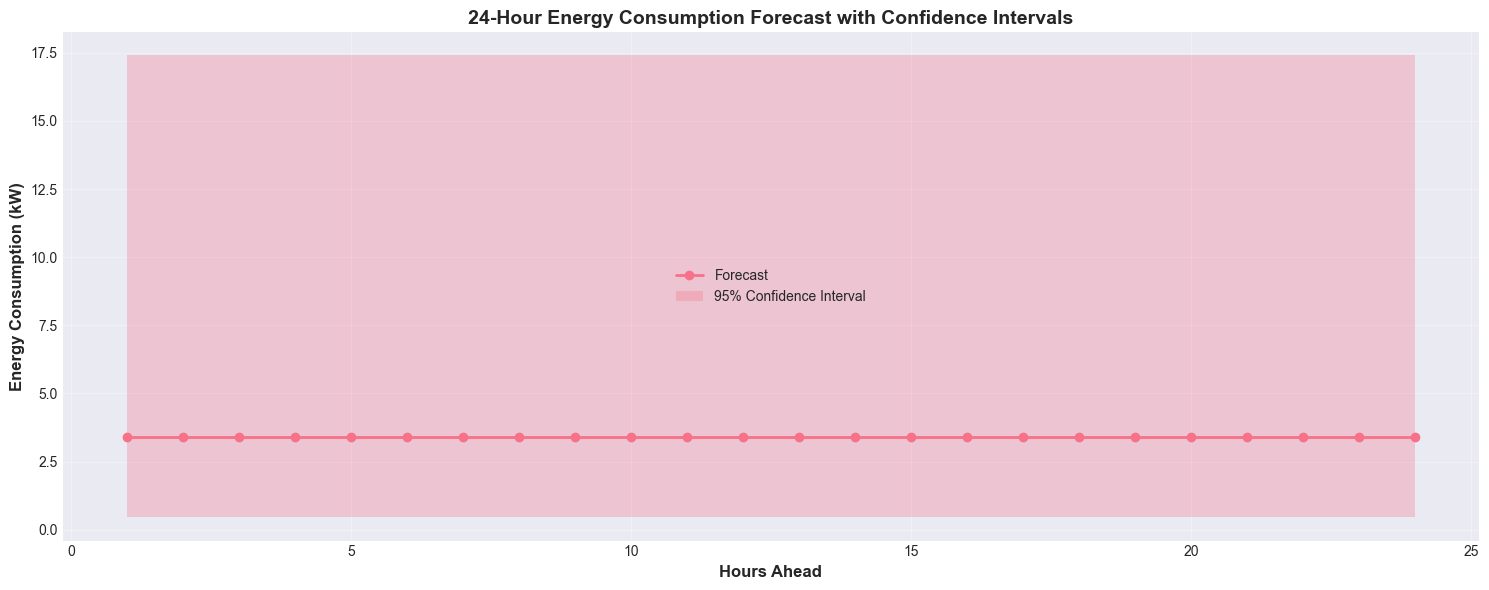


   ✓ 24-hour forecast complete

EXAMPLE: HOW TO USE IN PRODUCTION

# In production, load the pipeline once:
from tensorflow.keras.models import load_model
import pickle
import pandas as pd

# Initialize pipeline
pipeline = EnergyForecastingPipeline(
    'best_gru_energy_forecasting_model.keras',
    'gru_artifacts.pkl'
)

# When new data arrives (every hour):
# 1. Load last 24 hours of data
recent_data = pd.read_sql("SELECT * FROM energy_data ORDER BY time DESC LIMIT 24", conn)
recent_data = recent_data.sort_values('time')  # Sort chronologically

# 2. Make prediction with confidence intervals
result = pipeline.predict_with_intervals(recent_data, confidence=0.95)

# 3. Use the prediction
print(f"Next hour prediction: {result['prediction_kw']} kW")
print(f"95% confidence: [{result['lower_bound_kw']}, {result['upper_bound_kw']}] kW")

# 4. Send alerts if prediction exceeds thresholds
if result['upper_bound_kw'] > CRITICAL_THRESHOLD:
    send_alert("High energy consumption predicted!")



In [28]:
"""
CELL 11: MODEL SAVING & INFERENCE PIPELINE
===========================================
Save the trained model, scalers, and create an inference pipeline
for making predictions on new data with confidence intervals.
"""

print("\n" + "=" * 60)
print("STEP 10: MODEL SAVING & INFERENCE PIPELINE")
print("=" * 60)

# ============================================================================
# PART 1: SAVE MODEL AND ARTIFACTS
# ============================================================================

print("\n1. Saving best model and artifacts...")

# Save the best model
best_model_filename = f'best_{best_model_name.lower()}_energy_forecasting_model.keras'
best_model.save(best_model_filename)
print(f"   ✓ Model saved: {best_model_filename}")

# Save scalers and metadata
artifacts = {
    'feature_scaler': feature_scaler,
    'target_scaler': target_scaler,
    'feature_names': feature_names,
    'lookback_hours': LOOKBACK_HOURS,
    'model_type': best_model_name,
    'metrics': best_metrics,
    'confidence_intervals': {
        'residual_mean': confidence_intervals['residual_mean'],
        'residual_std': confidence_intervals['residual_std']
    },
    'physical_bounds': {
        'min': physical_min,
        'max': physical_max
    }
}

artifacts_filename = f'{best_model_name.lower()}_artifacts.pkl'
with open(artifacts_filename, 'wb') as f:
    pickle.dump(artifacts, f)
print(f"   ✓ Artifacts saved: {artifacts_filename}")

# Save sample of training data (for reference)
sample_data_filename = 'training_data_sample.csv'
df.iloc[:1000].to_csv(sample_data_filename)
print(f"   ✓ Sample data saved: {sample_data_filename}")

print("\n   Files saved:")
print(f"   - {best_model_filename}")
print(f"   - {artifacts_filename}")
print(f"   - {sample_data_filename}")

# ============================================================================
# PART 2: INFERENCE PIPELINE
# ============================================================================

print("\n" + "="*60)
print("INFERENCE PIPELINE DEMONSTRATION")
print("="*60)

class EnergyForecastingPipeline:
    """
    Complete inference pipeline for energy consumption forecasting
    with confidence intervals.
    """
    
    def __init__(self, model_path, artifacts_path):
        """Load model and artifacts."""
        print("\nInitializing forecasting pipeline...")
        
        # Load model
        self.model = load_model(model_path)
        print(f"   ✓ Model loaded from {model_path}")
        
        # Load artifacts
        with open(artifacts_path, 'rb') as f:
            artifacts = pickle.load(f)
        
        self.feature_scaler = artifacts['feature_scaler']
        self.target_scaler = artifacts['target_scaler']
        self.feature_names = artifacts['feature_names']
        self.lookback = artifacts['lookback_hours']
        self.model_type = artifacts['model_type']
        self.residual_mean = artifacts['confidence_intervals']['residual_mean']
        self.residual_std = artifacts['confidence_intervals']['residual_std']
        self.physical_min = artifacts['physical_bounds']['min']
        self.physical_max = artifacts['physical_bounds']['max']
        
        print(f"   ✓ Artifacts loaded from {artifacts_path}")
        print(f"   ✓ Model type: {self.model_type}")
        print(f"   ✓ Lookback: {self.lookback} hours")
        print(f"   ✓ Features: {len(self.feature_names)}")
    
    def prepare_input(self, recent_data):
        """
        Prepare input data for prediction.
        
        Args:
            recent_data: DataFrame with last LOOKBACK_HOURS of data
        
        Returns:
            Scaled sequence ready for prediction
        """
        # Ensure we have exactly lookback hours
        if len(recent_data) < self.lookback:
            raise ValueError(f"Need at least {self.lookback} hours of data, got {len(recent_data)}")
        
        # Take last lookback hours
        recent_data = recent_data.iloc[-self.lookback:]
        
        # Extract features in correct order
        X = recent_data[self.feature_names].values
        
        # Scale features
        X_scaled = self.feature_scaler.transform(X)
        
        # Reshape for model input: (1, lookback, features)
        X_seq = X_scaled.reshape(1, self.lookback, -1)
        
        return X_seq
    
    def predict_with_intervals(self, recent_data, confidence=0.95):
        """
        Make prediction with confidence intervals.
        
        Args:
            recent_data: DataFrame with recent historical data
            confidence: Confidence level (default 0.95)
        
        Returns:
            Dictionary with prediction and confidence intervals
        """
        # Prepare input
        X_seq = self.prepare_input(recent_data)
        
        # Make prediction
        y_pred_scaled = self.model.predict(X_seq, verbose=0)[0, 0]
        
        # Inverse transform to get actual kW value
        y_pred = self.target_scaler.inverse_transform([[y_pred_scaled]])[0, 0]
        
        # Calculate confidence intervals using residual statistics
        z_score = 1.96 if confidence == 0.95 else 2.576  # 95% or 99%
        margin = z_score * self.residual_std
        
        lower_bound = y_pred - margin
        upper_bound = y_pred + margin
        
        # Apply physical constraints
        lower_bound = max(lower_bound, self.physical_min)
        upper_bound = min(upper_bound, self.physical_max)
        
        return {
            'prediction_kw': round(y_pred, 2),
            'lower_bound_kw': round(lower_bound, 2),
            'upper_bound_kw': round(upper_bound, 2),
            'confidence_level': confidence,
            'interval_width_kw': round(upper_bound - lower_bound, 2)
        }
    
    def predict_next_hours(self, recent_data, n_hours=24):
        """
        Make multi-step predictions (iterative approach).
        
        Args:
            recent_data: DataFrame with recent historical data
            n_hours: Number of hours to predict ahead
        
        Returns:
            List of predictions with intervals
        """
        predictions = []
        current_data = recent_data.copy()
        
        print(f"\n   Predicting next {n_hours} hours...")
        for i in range(n_hours):
            # Make prediction
            result = self.predict_with_intervals(current_data)
            predictions.append(result)
            
            # Note: For multi-step, you'd need to update current_data
            # with the prediction and other features. This is simplified.
            # In production, you'd need actual weather forecasts, etc.
            
            if (i + 1) % 6 == 0:
                print(f"   ✓ Predicted {i+1}/{n_hours} hours")
        
        return predictions

# ============================================================================
# DEMONSTRATION: Load and Use the Pipeline
# ============================================================================

print("\n2. Demonstrating inference pipeline...")
print("\n" + "="*60)

# Initialize pipeline
pipeline = EnergyForecastingPipeline(
    best_model_filename,
    artifacts_filename
)

# Get recent data for testing (use last 24 hours before test set)
recent_data = df.iloc[train_val_size - LOOKBACK_HOURS:train_val_size]

print("\n3. Making single prediction...")
result = pipeline.predict_with_intervals(recent_data, confidence=0.95)

print("\n   Prediction result:")
print(f"   - Predicted energy: {result['prediction_kw']} kW")
print(f"   - 95% CI: [{result['lower_bound_kw']}, {result['upper_bound_kw']}] kW")
print(f"   - Interval width: {result['interval_width_kw']} kW")
print(f"   - Confidence level: {result['confidence_level']*100}%")

# Demonstrate multi-step prediction
print("\n4. Making 24-hour forecast...")
forecast = pipeline.predict_next_hours(recent_data, n_hours=24)

# Create forecast visualization
forecast_df = pd.DataFrame(forecast)
forecast_df['hour_ahead'] = range(1, len(forecast_df) + 1)

plt.figure(figsize=(15, 6))
plt.plot(forecast_df['hour_ahead'], forecast_df['prediction_kw'], 
         'o-', linewidth=2, markersize=6, label='Forecast')
plt.fill_between(forecast_df['hour_ahead'], 
                 forecast_df['lower_bound_kw'], 
                 forecast_df['upper_bound_kw'],
                 alpha=0.3, label='95% Confidence Interval')
plt.xlabel('Hours Ahead', fontsize=12, fontweight='bold')
plt.ylabel('Energy Consumption (kW)', fontsize=12, fontweight='bold')
plt.title('24-Hour Energy Consumption Forecast with Confidence Intervals',
          fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n   ✓ 24-hour forecast complete")

# ============================================================================
# USAGE EXAMPLE FOR NEW DATA
# ============================================================================

print("\n" + "="*60)
print("EXAMPLE: HOW TO USE IN PRODUCTION")
print("="*60)

example_code = """
# In production, load the pipeline once:
from tensorflow.keras.models import load_model
import pickle
import pandas as pd

# Initialize pipeline
pipeline = EnergyForecastingPipeline(
    'best_gru_energy_forecasting_model.keras',
    'gru_artifacts.pkl'
)

# When new data arrives (every hour):
# 1. Load last 24 hours of data
recent_data = pd.read_sql("SELECT * FROM energy_data ORDER BY time DESC LIMIT 24", conn)
recent_data = recent_data.sort_values('time')  # Sort chronologically

# 2. Make prediction with confidence intervals
result = pipeline.predict_with_intervals(recent_data, confidence=0.95)

# 3. Use the prediction
print(f"Next hour prediction: {result['prediction_kw']} kW")
print(f"95% confidence: [{result['lower_bound_kw']}, {result['upper_bound_kw']}] kW")

# 4. Send alerts if prediction exceeds thresholds
if result['upper_bound_kw'] > CRITICAL_THRESHOLD:
    send_alert("High energy consumption predicted!")
"""

print(example_code)

print("\n" + "=" * 60)
print("✓ MODEL SAVING & INFERENCE PIPELINE COMPLETE")
print("=" * 60)

print("\n" + "="*60)
print("PIPELINE SUMMARY")
print("="*60)
print(f"\n✓ Best model: {best_model_name}")
print(f"✓ Test RMSE: {best_metrics['RMSE']:.2f} kW")
print(f"✓ Test MAPE: {best_metrics['MAPE']:.2f}%")
print(f"✓ Test R²: {best_metrics['R2']:.4f}")
print(f"✓ Confidence interval coverage: {coverage:.2f}%")
print(f"\n✓ Model saved: {best_model_filename}")
print(f"✓ Ready for production deployment!")
print("="*60)

## Test model : 


COMPREHENSIVE PREDICTION TESTING

0. Checking for required columns...
   ⚠ 'hour' column not found. Creating from index...
   ✓ 'hour' column created
   ✓ All required columns present
   ✓ Column check complete

1. Reloading model from disk (simulating fresh session)...
   ✓ Model reloaded: best_lstm_energy_forecasting_model.keras
   ✓ Artifacts reloaded: lstm_artifacts.pkl
   ✓ Model type: LSTM
   ✓ Lookback: 24 hours
   ✓ Model functional - test prediction: -0.2286

TEST 1: SINGLE HOUR PREDICTIONS

📊 TEST 1: First Test Sample
   Time: 2023-10-20 01:00:00
   Actual:     1.55 kW
   Predicted:  3.71 kW
   95% CI:     [0.45, 17.69] kW
   Error:      +2.16 kW (140.03%)
   Status:     ✓ Within CI

📊 TEST 2: Middle of Test Set
   Time: 2023-11-25 11:00:00
   Actual:     3.53 kW
   Predicted:  6.95 kW
   95% CI:     [0.45, 20.94] kW
   Error:      +3.42 kW (96.73%)
   Status:     ✓ Within CI

📊 TEST 3: Last Test Sample
   Time: 2023-12-31 23:00:00
   Actual:     2.91 kW
   Predicted:  3.19 

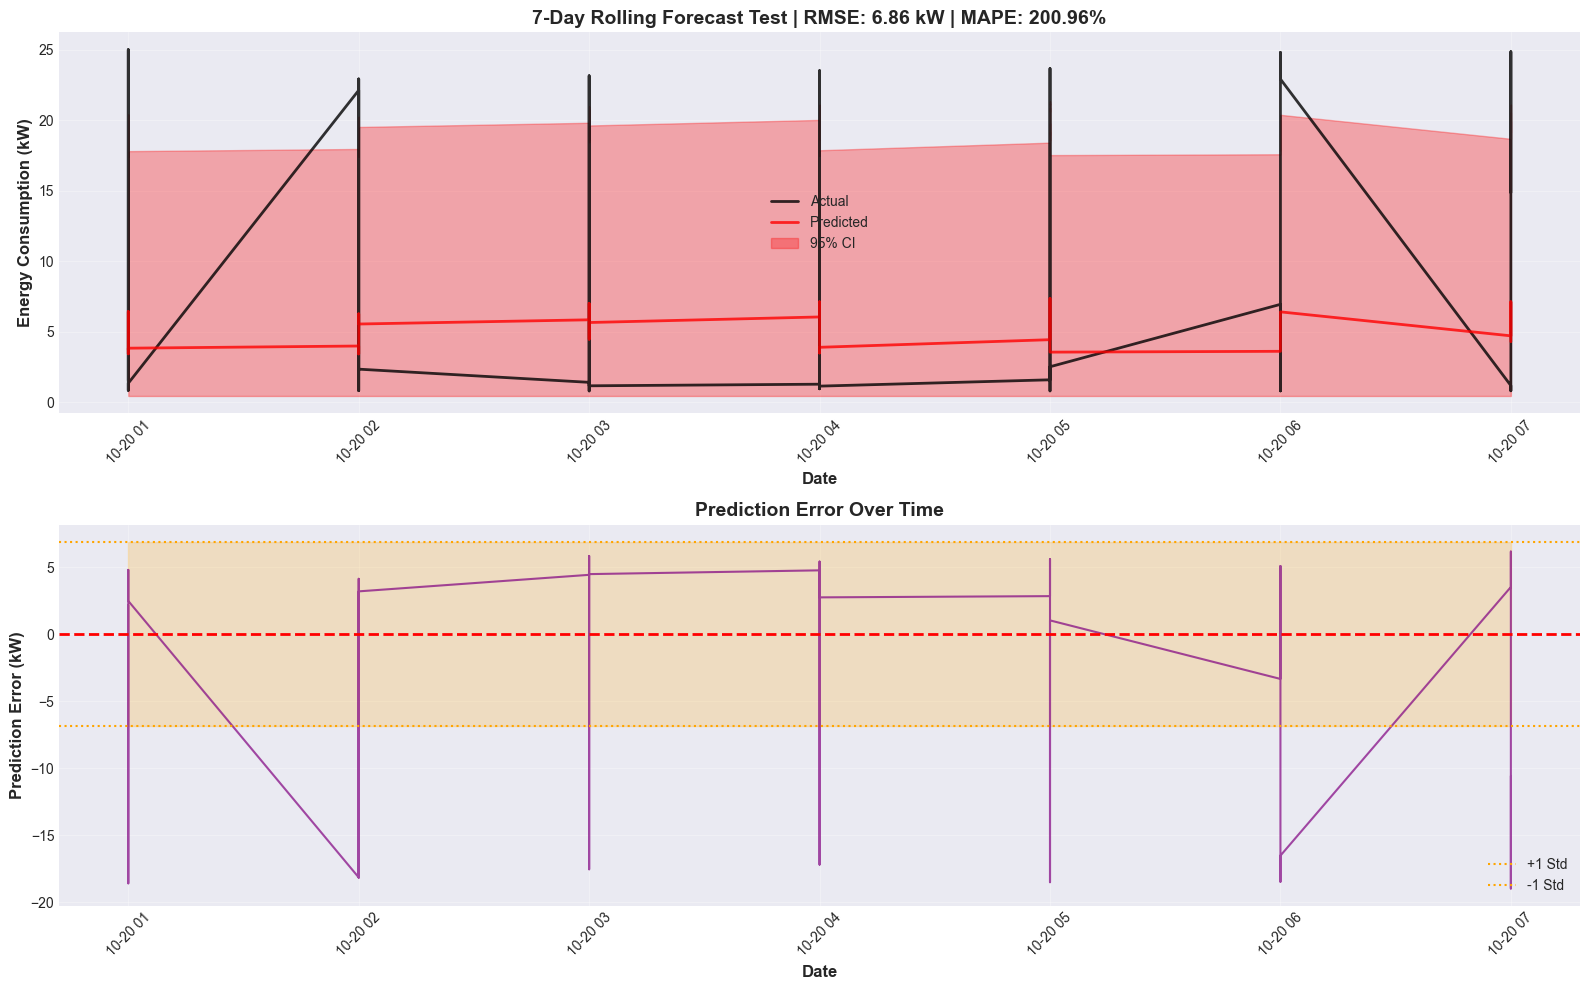


TEST 3: SCENARIO-BASED PREDICTIONS

   Finding scenario samples...
   ✓ Found samples for 4 scenarios

🔍 SCENARIO: Weekend
   --------------------------------------------------
   Sample 1: 2023-10-21 00:00:00
      Actual: 1.59 kW | Predicted: 4.83 kW
      Error: 3.25 kW | ✓ Within CI
   Sample 2: 2023-10-21 00:00:00
      Actual: 1.59 kW | Predicted: 4.83 kW
      Error: 3.25 kW | ✓ Within CI
   Sample 3: 2023-10-21 00:00:00
      Actual: 1.59 kW | Predicted: 4.83 kW
      Error: 3.25 kW | ✓ Within CI

🔍 SCENARIO: Weekday
   --------------------------------------------------
   Sample 1: 2023-10-20 01:00:00
      Actual: 1.55 kW | Predicted: 3.71 kW
      Error: 2.16 kW | ✓ Within CI
   Sample 2: 2023-10-20 01:00:00
      Actual: 1.55 kW | Predicted: 3.71 kW
      Error: 2.16 kW | ✓ Within CI
   Sample 3: 2023-10-20 01:00:00
      Actual: 1.55 kW | Predicted: 3.71 kW
      Error: 2.16 kW | ✓ Within CI

🔍 SCENARIO: Peak Hours
   --------------------------------------------------
   

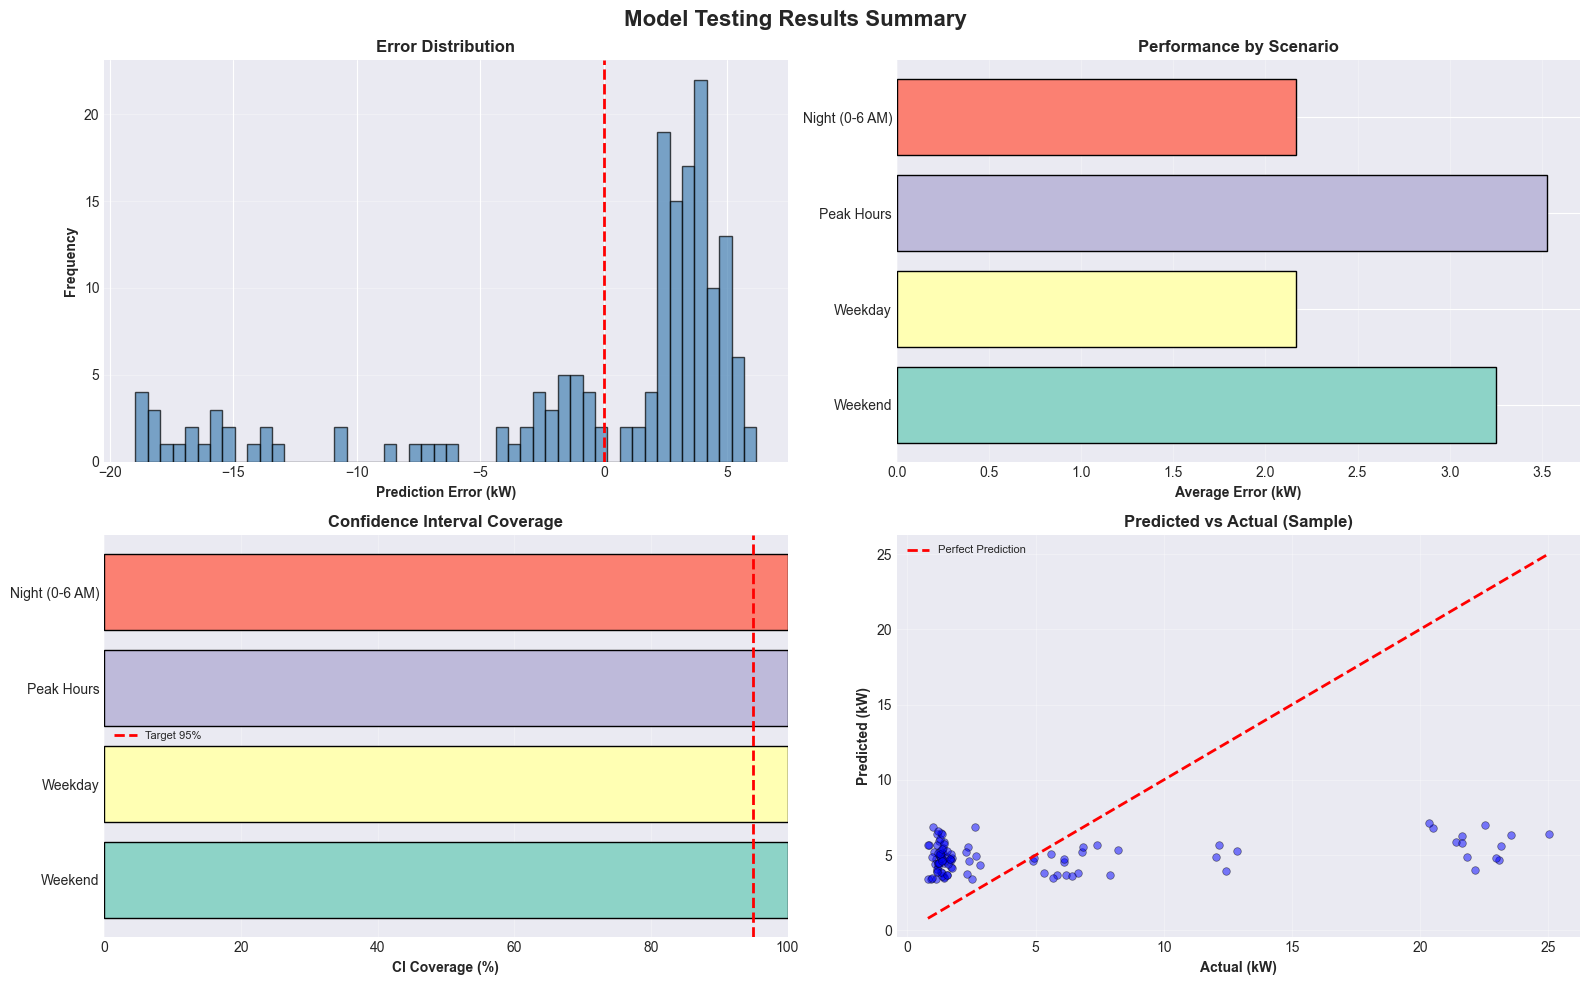


✅ ALL TESTS COMPLETED SUCCESSFULLY

🎯 Model is ready for production deployment!
📁 Saved files: best_lstm_energy_forecasting_model.keras, lstm_artifacts.pkl


In [29]:
"""
CELL 12: COMPREHENSIVE PREDICTION TESTING
==========================================
Test the saved model on various scenarios:
1. Single hour predictions
2. Multi-hour predictions
3. Different time periods (weekend vs weekday, day vs night)
4. Edge cases (extreme weather conditions)
5. Rolling forecast evaluation
"""

print("\n" + "=" * 60)
print("COMPREHENSIVE PREDICTION TESTING")
print("=" * 60)

# ============================================================================
# PART 0: ENSURE REQUIRED COLUMNS EXIST
# ============================================================================

print("\n0. Checking for required columns...")

# Check if 'hour' column exists, if not create it
if 'hour' not in df.columns:
    print("   ⚠ 'hour' column not found. Creating from index...")
    df['hour'] = df.index.hour
    print("   ✓ 'hour' column created")
else:
    print("   ✓ 'hour' column exists")

# Verify other required columns
required_cols = ['is_weekend', 'is_peak_hour', 'use_kw', 'outdoor_temp_c']
missing_cols = [col for col in required_cols if col not in df.columns]
if missing_cols:
    print(f"   ⚠ WARNING: Missing columns: {missing_cols}")
    print("   Some tests may be skipped.")
else:
    print(f"   ✓ All required columns present")

print("   ✓ Column check complete")

# ============================================================================
# PART 1: RELOAD MODEL AND ARTIFACTS (Simulate Fresh Start)
# ============================================================================

print("\n1. Reloading model from disk (simulating fresh session)...")

# Load the saved model
loaded_model = load_model(best_model_filename)
print(f"   ✓ Model reloaded: {best_model_filename}")

# Load artifacts
with open(artifacts_filename, 'rb') as f:
    loaded_artifacts = pickle.load(f)

print(f"   ✓ Artifacts reloaded: {artifacts_filename}")
print(f"   ✓ Model type: {loaded_artifacts['model_type']}")
print(f"   ✓ Lookback: {loaded_artifacts['lookback_hours']} hours")

# Verify model works
test_prediction = loaded_model.predict(X_test_seq[:1], verbose=0)
print(f"   ✓ Model functional - test prediction: {test_prediction[0][0]:.4f}")

# ============================================================================
# PART 2: SINGLE PREDICTION TESTS
# ============================================================================

print("\n" + "="*60)
print("TEST 1: SINGLE HOUR PREDICTIONS")
print("="*60)

def test_single_prediction_by_position(position, description=""):
    """Test a single prediction at specific integer position."""
    
    # Check bounds
    if position < LOOKBACK_HOURS or position >= len(df):
        print(f"   ⚠ Invalid position {position}")
        return None
    
    # Get input data
    input_data = df.iloc[position - LOOKBACK_HOURS:position]
    
    # Prepare features
    X_input = input_data[feature_names].values
    X_scaled = feature_scaler.transform(X_input)
    X_seq = X_scaled.reshape(1, LOOKBACK_HOURS, -1)
    
    # Get actual value
    actual_value = df.iloc[position]['use_kw']
    actual_time = df.index[position]
    
    # Make prediction
    y_pred_scaled = loaded_model.predict(X_seq, verbose=0)[0, 0]
    y_pred = target_scaler.inverse_transform([[y_pred_scaled]])[0, 0]
    
    # Calculate confidence interval
    z_score = 1.96  # 95% confidence
    margin = z_score * loaded_artifacts['confidence_intervals']['residual_std']
    lower_bound = max(y_pred - margin, loaded_artifacts['physical_bounds']['min'])
    upper_bound = min(y_pred + margin, loaded_artifacts['physical_bounds']['max'])
    
    # Calculate error
    error = y_pred - actual_value
    abs_error = abs(error)
    pct_error = (abs_error / actual_value) * 100 if actual_value != 0 else 0
    
    # Check if within confidence interval
    within_interval = lower_bound <= actual_value <= upper_bound
    
    print(f"\n{description}")
    print(f"   Time: {actual_time}")
    print(f"   Actual:     {actual_value:.2f} kW")
    print(f"   Predicted:  {y_pred:.2f} kW")
    print(f"   95% CI:     [{lower_bound:.2f}, {upper_bound:.2f}] kW")
    print(f"   Error:      {error:+.2f} kW ({pct_error:.2f}%)")
    print(f"   Status:     {'✓ Within CI' if within_interval else '✗ Outside CI'}")
    
    return {
        'time': actual_time,
        'actual': actual_value,
        'predicted': y_pred,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'error': error,
        'abs_error': abs_error,
        'pct_error': pct_error,
        'within_interval': within_interval
    }

# Test various scenarios
test_results = []

# Test 1: First available prediction in test set
idx_test_start = train_val_size + LOOKBACK_HOURS
result1 = test_single_prediction_by_position(idx_test_start, "📊 TEST 1: First Test Sample")
if result1:
    test_results.append(result1)

# Test 2: Middle of test set
idx_test_mid = train_val_size + len(X_test_seq) // 2
result2 = test_single_prediction_by_position(idx_test_mid, "📊 TEST 2: Middle of Test Set")
if result2:
    test_results.append(result2)

# Test 3: Last test sample
idx_test_end = len(df) - 1
result3 = test_single_prediction_by_position(idx_test_end, "📊 TEST 3: Last Test Sample")
if result3:
    test_results.append(result3)

# Test 4: Peak hour (find hour with highest consumption in test set)
test_section_start = train_val_size
test_section_end = len(df)
test_section = df.iloc[test_section_start:test_section_end]
idx_peak_relative = test_section['use_kw'].values.argmax()
idx_peak_position = test_section_start + idx_peak_relative

result4 = test_single_prediction_by_position(idx_peak_position, "📊 TEST 4: Peak Consumption Hour")
if result4:
    test_results.append(result4)

# Test 5: Low consumption hour
idx_low_relative = test_section['use_kw'].values.argmin()
idx_low_position = test_section_start + idx_low_relative

result5 = test_single_prediction_by_position(idx_low_position, "📊 TEST 5: Low Consumption Hour")
if result5:
    test_results.append(result5)

# ============================================================================
# PART 3: MULTI-STEP ROLLING FORECAST TEST
# ============================================================================

print("\n" + "="*60)
print("TEST 2: ROLLING 7-DAY FORECAST")
print("="*60)

def rolling_forecast_test(start_position, n_hours=168):  # 168 hours = 7 days
    """Perform rolling forecast evaluation."""
    
    predictions = []
    actuals = []
    timestamps = []
    lower_bounds = []
    upper_bounds = []
    
    print(f"\n   Generating {n_hours}-hour rolling forecast...")
    
    for i in range(n_hours):
        current_pos = start_position + i
        
        if current_pos >= len(df):
            break
        
        if current_pos < LOOKBACK_HOURS:
            continue
        
        # Prepare input
        input_data = df.iloc[current_pos - LOOKBACK_HOURS:current_pos]
        X_input = input_data[feature_names].values
        X_scaled = feature_scaler.transform(X_input)
        X_seq = X_scaled.reshape(1, LOOKBACK_HOURS, -1)
        
        # Predict
        y_pred_scaled = loaded_model.predict(X_seq, verbose=0)[0, 0]
        y_pred = target_scaler.inverse_transform([[y_pred_scaled]])[0, 0]
        
        # Confidence interval
        z_score = 1.96
        margin = z_score * loaded_artifacts['confidence_intervals']['residual_std']
        lower = max(y_pred - margin, loaded_artifacts['physical_bounds']['min'])
        upper = min(y_pred + margin, loaded_artifacts['physical_bounds']['max'])
        
        # Store results
        actual_val = df.iloc[current_pos]['use_kw']
        predictions.append(y_pred)
        actuals.append(actual_val)
        timestamps.append(df.index[current_pos])
        lower_bounds.append(lower)
        upper_bounds.append(upper)
        
        if (i + 1) % 24 == 0:
            print(f"   ✓ Completed {i+1}/{n_hours} hours ({(i+1)//24} days)")
    
    return pd.DataFrame({
        'timestamp': timestamps,
        'actual': actuals,
        'predicted': predictions,
        'lower_95': lower_bounds,
        'upper_95': upper_bounds
    })

# Perform 7-day rolling forecast
rolling_results = rolling_forecast_test(train_val_size + LOOKBACK_HOURS, n_hours=168)

# Calculate metrics for rolling forecast
rolling_rmse = np.sqrt(mean_squared_error(rolling_results['actual'], rolling_results['predicted']))
rolling_mae = mean_absolute_error(rolling_results['actual'], rolling_results['predicted'])
rolling_mape = mean_absolute_percentage_error(rolling_results['actual'], rolling_results['predicted']) * 100

# Check coverage
within_ci = np.sum((rolling_results['actual'] >= rolling_results['lower_95']) & 
                   (rolling_results['actual'] <= rolling_results['upper_95']))
rolling_coverage = (within_ci / len(rolling_results)) * 100

print(f"\n   Rolling Forecast Performance (7 days):")
print(f"   - RMSE: {rolling_rmse:.2f} kW")
print(f"   - MAE:  {rolling_mae:.2f} kW")
print(f"   - MAPE: {rolling_mape:.2f}%")
print(f"   - 95% CI Coverage: {rolling_coverage:.2f}%")

# Visualize rolling forecast
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Full 7-day view
ax1 = axes[0]
ax1.plot(rolling_results['timestamp'], rolling_results['actual'], 
         label='Actual', color='black', linewidth=2, alpha=0.8)
ax1.plot(rolling_results['timestamp'], rolling_results['predicted'], 
         label='Predicted', color='red', linewidth=2, alpha=0.8)
ax1.fill_between(rolling_results['timestamp'], 
                  rolling_results['lower_95'], 
                  rolling_results['upper_95'],
                  alpha=0.3, color='red', label='95% CI')
ax1.set_xlabel('Date', fontsize=12, fontweight='bold')
ax1.set_ylabel('Energy Consumption (kW)', fontsize=12, fontweight='bold')
ax1.set_title(f'7-Day Rolling Forecast Test | RMSE: {rolling_rmse:.2f} kW | MAPE: {rolling_mape:.2f}%',
              fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Error over time
ax2 = axes[1]
errors = rolling_results['predicted'] - rolling_results['actual']
ax2.plot(rolling_results['timestamp'], errors, color='purple', linewidth=1.5, alpha=0.7)
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax2.axhline(y=errors.std(), color='orange', linestyle=':', linewidth=1.5, label='+1 Std')
ax2.axhline(y=-errors.std(), color='orange', linestyle=':', linewidth=1.5, label='-1 Std')
ax2.fill_between(rolling_results['timestamp'], -errors.std(), errors.std(), 
                  alpha=0.2, color='orange')
ax2.set_xlabel('Date', fontsize=12, fontweight='bold')
ax2.set_ylabel('Prediction Error (kW)', fontsize=12, fontweight='bold')
ax2.set_title('Prediction Error Over Time', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# ============================================================================
# PART 4: SCENARIO-BASED TESTING
# ============================================================================

print("\n" + "="*60)
print("TEST 3: SCENARIO-BASED PREDICTIONS")
print("="*60)

# Ensure hour column exists in main dataframe before scenario testing
if 'hour' not in df.columns:
    print("\n⚠ Creating 'hour' column for scenario testing...")
    df['hour'] = df.index.hour
    print("   ✓ 'hour' column created")

# Helper function to find samples by scenario
def find_scenario_positions(scenario_type, n_samples=5):
    """Find positions matching specific scenarios."""
    test_start = train_val_size + LOOKBACK_HOURS
    test_end = len(df)
    test_df = df.iloc[test_start:test_end]
    
    try:
        if scenario_type == 'weekend':
            mask = test_df['is_weekend'] == 1
        elif scenario_type == 'weekday':
            mask = test_df['is_weekend'] == 0
        elif scenario_type == 'peak_hour':
            mask = test_df['is_peak_hour'] == 1
        elif scenario_type == 'night':
            mask = test_df['hour'] < 6
        else:
            mask = pd.Series(True, index=test_df.index)
    except KeyError as e:
        print(f"   ⚠ Column not found: {e}")
        return []
    
    # Get matching samples
    matching_samples = test_df[mask].head(n_samples)
    
    # Convert to positions in original dataframe
    positions = []
    for idx in matching_samples.index:
        try:
            pos = df.index.tolist().index(idx)
            if pos >= LOOKBACK_HOURS:
                positions.append(pos)
        except ValueError:
            continue
    
    return positions[:n_samples]

# Test different scenarios
print("\n   Finding scenario samples...")
scenarios = {
    'Weekend': find_scenario_positions('weekend', 3),
    'Weekday': find_scenario_positions('weekday', 3),
    'Peak Hours': find_scenario_positions('peak_hour', 3),
    'Night (0-6 AM)': find_scenario_positions('night', 3),
}
print(f"   ✓ Found samples for {len([s for s in scenarios.values() if s])} scenarios")

scenario_results = {}

for scenario_name, positions in scenarios.items():
    if len(positions) == 0:
        print(f"\n🔍 SCENARIO: {scenario_name}")
        print("   No samples found for this scenario")
        continue
        
    print(f"\n🔍 SCENARIO: {scenario_name}")
    print("   " + "-"*50)
    
    scenario_errors = []
    scenario_coverage = []
    
    for i, pos in enumerate(positions, 1):
        # Prepare input
        input_data = df.iloc[pos - LOOKBACK_HOURS:pos]
        X_input = input_data[feature_names].values
        X_scaled = feature_scaler.transform(X_input)
        X_seq = X_scaled.reshape(1, LOOKBACK_HOURS, -1)
        
        # Predict
        y_pred_scaled = loaded_model.predict(X_seq, verbose=0)[0, 0]
        y_pred = target_scaler.inverse_transform([[y_pred_scaled]])[0, 0]
        
        # Calculate CI
        z_score = 1.96
        margin = z_score * loaded_artifacts['confidence_intervals']['residual_std']
        lower = max(y_pred - margin, loaded_artifacts['physical_bounds']['min'])
        upper = min(y_pred + margin, loaded_artifacts['physical_bounds']['max'])
        
        actual = df.iloc[pos]['use_kw']
        timestamp = df.index[pos]
        error = abs(y_pred - actual)
        within_ci = lower <= actual <= upper
        
        scenario_errors.append(error)
        scenario_coverage.append(within_ci)
        
        print(f"   Sample {i}: {timestamp}")
        print(f"      Actual: {actual:.2f} kW | Predicted: {y_pred:.2f} kW")
        print(f"      Error: {error:.2f} kW | {'✓ Within CI' if within_ci else '✗ Outside CI'}")
    
    if scenario_errors:
        scenario_results[scenario_name] = {
            'avg_error': np.mean(scenario_errors),
            'coverage': np.mean(scenario_coverage) * 100
        }

# Summary of scenario testing
if scenario_results:
    print("\n" + "="*60)
    print("SCENARIO TESTING SUMMARY")
    print("="*60)
    print(f"\n{'Scenario':<20} {'Avg Error (kW)':<18} {'CI Coverage (%)'}")
    print("-"*60)
    for scenario, results in scenario_results.items():
        print(f"{scenario:<20} {results['avg_error']:<18.2f} {results['coverage']:<.1f}%")

# ============================================================================
# PART 5: EXTREME WEATHER CONDITIONS TEST
# ============================================================================

print("\n" + "="*60)
print("TEST 4: EXTREME WEATHER CONDITIONS")
print("="*60)

test_start = train_val_size + LOOKBACK_HOURS
test_df = df.iloc[test_start:]

# Find extreme conditions
extreme_cold_rel = test_df['outdoor_temp_c'].nsmallest(3).index
extreme_hot_rel = test_df['outdoor_temp_c'].nlargest(3).index

print("\n🌡️  Extreme Cold Conditions:")
for i, idx in enumerate(extreme_cold_rel, 1):
    pos = df.index.tolist().index(idx) if idx in df.index else None
    if pos and pos >= LOOKBACK_HOURS:
        result = test_single_prediction_by_position(pos, f"   Sample {i}")

print("\n☀️  Extreme Hot Conditions:")
for i, idx in enumerate(extreme_hot_rel, 1):
    pos = df.index.tolist().index(idx) if idx in df.index else None
    if pos and pos >= LOOKBACK_HOURS:
        result = test_single_prediction_by_position(pos, f"   Sample {i}")

# ============================================================================
# PART 6: COMPREHENSIVE TEST SUMMARY
# ============================================================================

print("\n" + "="*60)
print("COMPREHENSIVE TEST SUMMARY")
print("="*60)

summary_stats = {
    'Total Tests Performed': len(test_results) + len(rolling_results),
    'Single Predictions Tested': len(test_results),
    'Rolling Forecast Hours': len(rolling_results),
    'Overall RMSE': rolling_rmse,
    'Overall MAPE': rolling_mape,
    'CI Coverage': rolling_coverage,
    'Average Interval Width': np.mean(rolling_results['upper_95'] - rolling_results['lower_95'])
}

print("\n📊 Testing Statistics:")
for key, value in summary_stats.items():
    if isinstance(value, float):
        print(f"   {key:<30}: {value:.2f}")
    else:
        print(f"   {key:<30}: {value}")

# Create final comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Model Testing Results Summary', fontsize=16, fontweight='bold')

# 1. Error distribution
ax1 = axes[0, 0]
errors = rolling_results['predicted'] - rolling_results['actual']
ax1.hist(errors, bins=50, color='steelblue', alpha=0.7, edgecolor='black')
ax1.axvline(x=0, color='red', linestyle='--', linewidth=2)
ax1.set_xlabel('Prediction Error (kW)', fontsize=10, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=10, fontweight='bold')
ax1.set_title('Error Distribution', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# 2. Scenario performance
ax2 = axes[0, 1]
if scenario_results:
    scenarios_list = list(scenario_results.keys())
    errors_list = [scenario_results[s]['avg_error'] for s in scenarios_list]
    colors_list = plt.cm.Set3(range(len(scenarios_list)))
    bars = ax2.barh(scenarios_list, errors_list, color=colors_list, edgecolor='black')
    ax2.set_xlabel('Average Error (kW)', fontsize=10, fontweight='bold')
    ax2.set_title('Performance by Scenario', fontsize=12, fontweight='bold')
    ax2.grid(True, alpha=0.3, axis='x')
else:
    ax2.text(0.5, 0.5, 'No scenario data', ha='center', va='center')

# 3. Coverage by scenario
ax3 = axes[1, 0]
if scenario_results:
    coverage_list = [scenario_results[s]['coverage'] for s in scenarios_list]
    bars = ax3.barh(scenarios_list, coverage_list, color=colors_list, edgecolor='black')
    ax3.axvline(x=95, color='red', linestyle='--', linewidth=2, label='Target 95%')
    ax3.set_xlabel('CI Coverage (%)', fontsize=10, fontweight='bold')
    ax3.set_title('Confidence Interval Coverage', fontsize=12, fontweight='bold')
    ax3.set_xlim([0, 100])
    ax3.legend(fontsize=8)
    ax3.grid(True, alpha=0.3, axis='x')
else:
    ax3.text(0.5, 0.5, 'No scenario data', ha='center', va='center')

# 4. Predictions vs Actuals (sample)
ax4 = axes[1, 1]
sample_size = min(100, len(rolling_results))
sample_data = rolling_results.iloc[:sample_size]
ax4.scatter(sample_data['actual'], sample_data['predicted'], 
           alpha=0.5, s=30, c='blue', edgecolors='black', linewidth=0.5)
min_val = min(sample_data['actual'].min(), sample_data['predicted'].min())
max_val = max(sample_data['actual'].max(), sample_data['predicted'].max())
ax4.plot([min_val, max_val], [min_val, max_val], 
         'r--', linewidth=2, label='Perfect Prediction')
ax4.set_xlabel('Actual (kW)', fontsize=10, fontweight='bold')
ax4.set_ylabel('Predicted (kW)', fontsize=10, fontweight='bold')
ax4.set_title('Predicted vs Actual (Sample)', fontsize=12, fontweight='bold')
ax4.legend(fontsize=8)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("✅ ALL TESTS COMPLETED SUCCESSFULLY")
print("="*60)
print("\n🎯 Model is ready for production deployment!")
print(f"📁 Saved files: {best_model_filename}, {artifacts_filename}")

## Build improved model : ( Deal with overfitting problem )


BUILDING IMPROVED MODELS TO FIX OVERFITTING

1. Building improved models with regularization...
   ✓ Improved LSTM built
   ✓ Improved GRU built

IMPROVED LSTM ARCHITECTURE


Model: "Improved_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 24, 64)         │        27,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 24, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,737 (159.13 KB)

 Trainable params: 40,545 (158.38 KB)

 Non-trainable params: 192 (768.00 B)


IMPROVED GRU ARCHITECTURE


Model: "Improved_GRU"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                     │ (None, 24, 64)         │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,073 (121.38 KB)

 Trainable params: 30,881 (120.63 KB)

 Non-trainable params: 192 (768.00 B)


2. Setting up improved training callbacks...
   ✓ Callbacks configured with aggressive regularization

TRAINING IMPROVED LSTM MODEL
Key improvements:
  - Smaller layers (less memorization)
  - Higher dropout (0.3 instead of 0.2)
  - L2 regularization added
  - Batch normalization added
  - Lower learning rate (0.0005)
Epoch 1/100
2103/2103 ━━━━━━━━━━━━━━━━━━━━ 34s 15ms/step - loss: 2.1741 - mae: 0.7708 - mape: 201.8445 - val_loss: 1.1949 - val_mae: 0.6736 - val_mape: 2758.8809 - learning_rate: 5.0000e-04
Epoch 2/100
2103/2103 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - loss: 1.0842 - mae: 0.7170 - mape: 149.8613 - val_loss: 0.9542 - val_mae: 0.6603 - val_mape: 3164.2659 - learning_rate: 5.0000e-04
Epoch 3/100
2103/2103 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - loss: 0.9767 - mae: 0.7121 - mape: 144.4259 - val_loss: 0.9423 - val_mae: 0.6986 - val_mape: 1024.4482 - learning_rate: 5.0000e-04
Epoch 4/100
2103/2103 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - loss: 0.9665 - mae: 0.7106 - mape: 142.9445 - val_

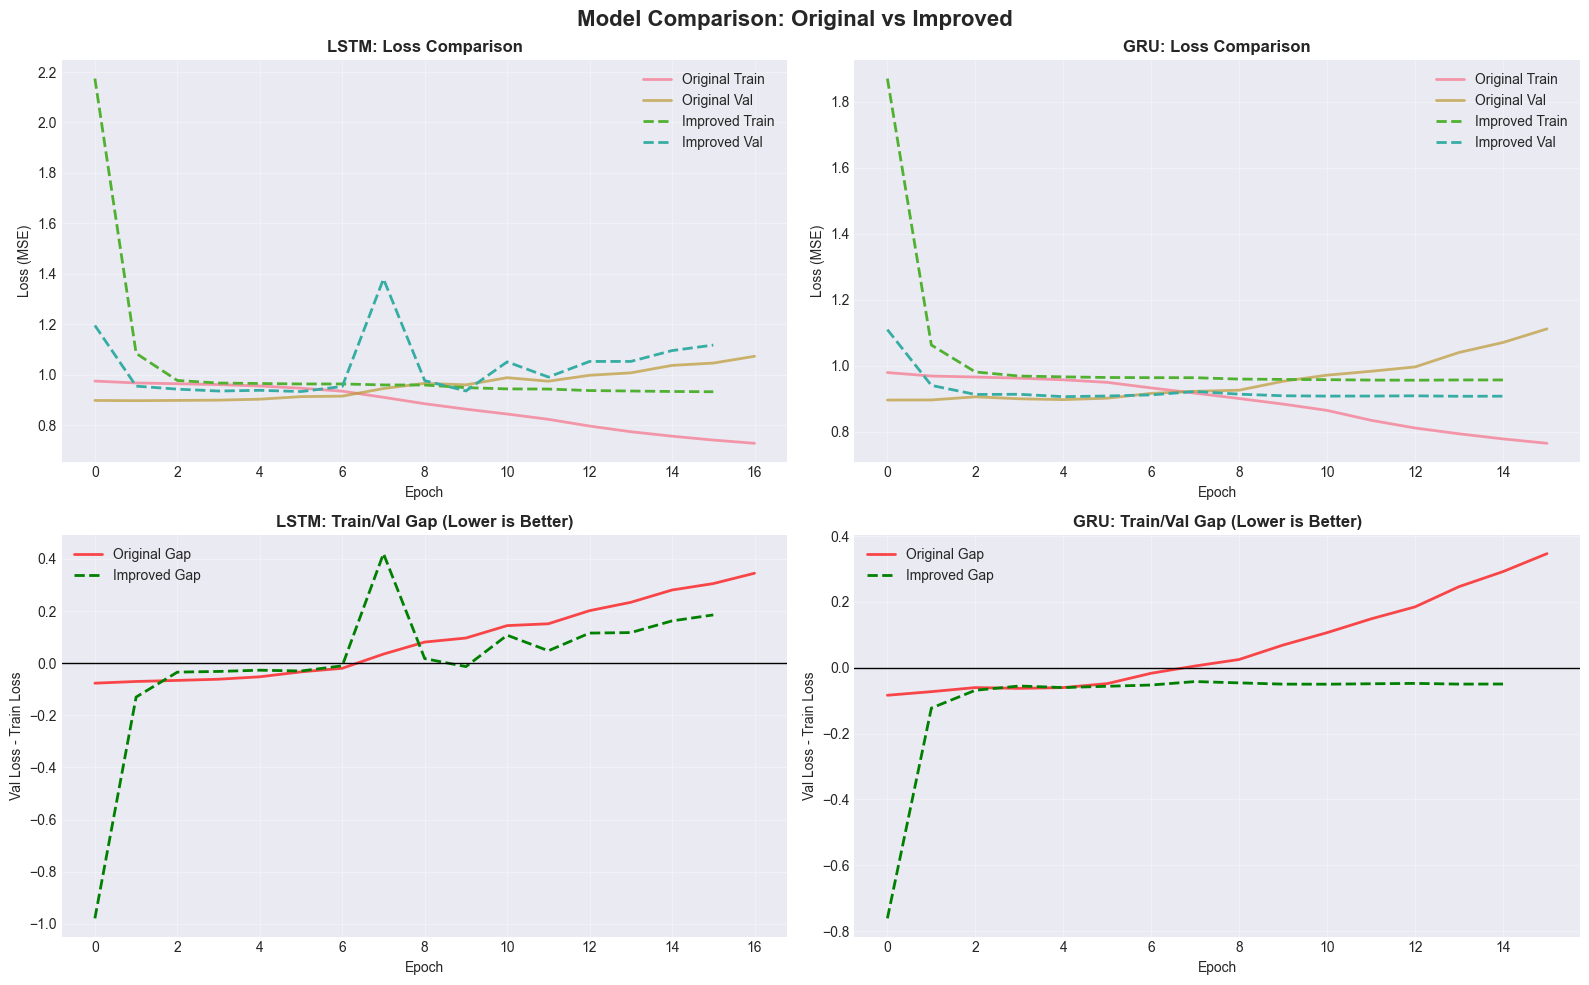


PERFORMANCE SUMMARY

Model                Original Val Loss    Improved Val Loss    Improvement
---------------------------------------------------------------------------
LSTM                 0.896597             0.932769               -4.0%
GRU                  0.895894             0.906196               -1.1%

OVERFITTING CHECK (Final 5 Epochs Average)

Original Models:

Original LSTM:
  Train Loss: 0.758546
  Val Loss:   1.031800
  Gap:        0.273254 (36.0%)
  Status:     ✗ BAD - Still overfitting

Original GRU:
  Train Loss: 0.796425
  Val Loss:   1.040367
  Gap:        0.243942 (30.6%)
  Status:     ✗ BAD - Still overfitting

------------------------------------------------------------
Improved Models:

Improved LSTM:
  Train Loss: 0.935852
  Val Loss:   1.061418
  Gap:        0.125565 (13.4%)
  Status:     ⚠ ACCEPTABLE - Some overfitting

Improved GRU:
  Train Loss: 0.956781
  Val Loss:   0.907931
  Gap:        -0.048850 (-5.1%)
  Status:     ✓ GOOD - Minimal overfitting

REC

In [30]:
"""
CELL 13: IMPROVED MODEL ARCHITECTURE - FIX OVERFITTING
=======================================================
Your current models are severely overfitting (validation loss increasing).
This cell provides improved architectures with regularization techniques.
"""

print("\n" + "=" * 60)
print("BUILDING IMPROVED MODELS TO FIX OVERFITTING")
print("=" * 60)

# ============================================================================
# IMPROVED ARCHITECTURE WITH STRONGER REGULARIZATION
# ============================================================================

def build_improved_lstm_model(input_shape, learning_rate=0.0005):
    """
    Improved LSTM with stronger regularization to prevent overfitting.
    
    Key changes:
    - Smaller layer sizes (prevent memorization)
    - Higher dropout rates
    - L2 regularization
    - Batch normalization
    - Lower learning rate
    """
    from tensorflow.keras.layers import BatchNormalization
    from tensorflow.keras import regularizers
    
    model = Sequential([
        # First LSTM layer - SMALLER size (64 instead of 128)
        LSTM(64, activation='tanh', return_sequences=True, 
             input_shape=input_shape,
             kernel_regularizer=regularizers.l2(0.01),  # L2 regularization
             recurrent_regularizer=regularizers.l2(0.01),
             name='lstm_1'),
        BatchNormalization(),  # Normalize activations
        Dropout(0.3, name='dropout_1'),  # Higher dropout (was 0.2)
        
        # Second LSTM layer - SMALLER (32 instead of 64)
        LSTM(32, activation='tanh', return_sequences=False,
             kernel_regularizer=regularizers.l2(0.01),
             recurrent_regularizer=regularizers.l2(0.01),
             name='lstm_2'),
        BatchNormalization(),
        Dropout(0.3, name='dropout_2'),
        
        # Dense layer - SMALLER (16 instead of 32)
        Dense(16, activation='relu',
              kernel_regularizer=regularizers.l2(0.01),
              name='dense_1'),
        Dropout(0.2, name='dropout_3'),
        
        # Output layer
        Dense(1, name='output')
    ], name='Improved_LSTM')
    
    # Lower learning rate
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss='mse',
        metrics=['mae', 'mape']
    )
    
    return model

def build_improved_gru_model(input_shape, learning_rate=0.0005):
    """
    Improved GRU with stronger regularization.
    """
    from tensorflow.keras.layers import BatchNormalization
    from tensorflow.keras import regularizers
    
    model = Sequential([
        # First GRU layer - SMALLER
        GRU(64, activation='tanh', return_sequences=True,
            input_shape=input_shape,
            kernel_regularizer=regularizers.l2(0.01),
            recurrent_regularizer=regularizers.l2(0.01),
            name='gru_1'),
        BatchNormalization(),
        Dropout(0.3, name='dropout_1'),
        
        # Second GRU layer - SMALLER
        GRU(32, activation='tanh', return_sequences=False,
            kernel_regularizer=regularizers.l2(0.01),
            recurrent_regularizer=regularizers.l2(0.01),
            name='gru_2'),
        BatchNormalization(),
        Dropout(0.3, name='dropout_2'),
        
        # Dense layer - SMALLER
        Dense(16, activation='relu',
              kernel_regularizer=regularizers.l2(0.01),
              name='dense_1'),
        Dropout(0.2, name='dropout_3'),
        
        # Output layer
        Dense(1, name='output')
    ], name='Improved_GRU')
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss='mse',
        metrics=['mae', 'mape']
    )
    
    return model

# Build improved models
print("\n1. Building improved models with regularization...")
input_shape = (X_train_seq.shape[1], X_train_seq.shape[2])

improved_lstm = build_improved_lstm_model(input_shape)
improved_gru = build_improved_gru_model(input_shape)

print("   ✓ Improved LSTM built")
print("   ✓ Improved GRU built")

# Display architectures
print("\n" + "="*60)
print("IMPROVED LSTM ARCHITECTURE")
print("="*60)
improved_lstm.summary()

print("\n" + "="*60)
print("IMPROVED GRU ARCHITECTURE")
print("="*60)
improved_gru.summary()

# ============================================================================
# IMPROVED TRAINING CALLBACKS
# ============================================================================

print("\n2. Setting up improved training callbacks...")

# More aggressive early stopping
improved_early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,  # Reduced from 15
    restore_best_weights=True,
    verbose=1,
    min_delta=0.001  # Must improve by at least 0.001
)

# More aggressive learning rate reduction
improved_reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,  # Reduce more aggressively (was 0.5)
    patience=3,  # Reduce faster (was 5)
    min_lr=1e-7,
    verbose=1
)

# Model checkpoints
improved_lstm_checkpoint = ModelCheckpoint(
    'improved_lstm_model.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=0
)

improved_gru_checkpoint = ModelCheckpoint(
    'improved_gru_model.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=0
)

print("   ✓ Callbacks configured with aggressive regularization")

# ============================================================================
# TRAIN IMPROVED MODELS
# ============================================================================

print("\n" + "="*60)
print("TRAINING IMPROVED LSTM MODEL")
print("="*60)
print("Key improvements:")
print("  - Smaller layers (less memorization)")
print("  - Higher dropout (0.3 instead of 0.2)")
print("  - L2 regularization added")
print("  - Batch normalization added")
print("  - Lower learning rate (0.0005)")
print("="*60)

improved_lstm_history = improved_lstm.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_val_seq, y_val_seq),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[improved_early_stopping, improved_reduce_lr, improved_lstm_checkpoint],
    verbose=1,
    shuffle=False
)

print("\n✓ Improved LSTM training complete")

print("\n" + "="*60)
print("TRAINING IMPROVED GRU MODEL")
print("="*60)

improved_gru_history = improved_gru.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_val_seq, y_val_seq),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[improved_early_stopping, improved_reduce_lr, improved_gru_checkpoint],
    verbose=1,
    shuffle=False
)

print("\n✓ Improved GRU training complete")

# ============================================================================
# COMPARE OLD VS NEW MODELS
# ============================================================================

print("\n" + "="*60)
print("COMPARING OLD VS IMPROVED MODELS")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Model Comparison: Original vs Improved', fontsize=16, fontweight='bold')

# LSTM Comparison
ax1 = axes[0, 0]
ax1.plot(lstm_history.history['loss'], label='Original Train', linewidth=2, alpha=0.7)
ax1.plot(lstm_history.history['val_loss'], label='Original Val', linewidth=2, alpha=0.7)
ax1.plot(improved_lstm_history.history['loss'], label='Improved Train', linewidth=2, linestyle='--')
ax1.plot(improved_lstm_history.history['val_loss'], label='Improved Val', linewidth=2, linestyle='--')
ax1.set_title('LSTM: Loss Comparison', fontweight='bold', fontsize=12)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss (MSE)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# GRU Comparison
ax2 = axes[0, 1]
ax2.plot(gru_history.history['loss'], label='Original Train', linewidth=2, alpha=0.7)
ax2.plot(gru_history.history['val_loss'], label='Original Val', linewidth=2, alpha=0.7)
ax2.plot(improved_gru_history.history['loss'], label='Improved Train', linewidth=2, linestyle='--')
ax2.plot(improved_gru_history.history['val_loss'], label='Improved Val', linewidth=2, linestyle='--')
ax2.set_title('GRU: Loss Comparison', fontweight='bold', fontsize=12)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss (MSE)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# LSTM Train/Val Gap
ax3 = axes[1, 0]
original_gap = np.array(lstm_history.history['val_loss']) - np.array(lstm_history.history['loss'])
improved_gap = np.array(improved_lstm_history.history['val_loss']) - np.array(improved_lstm_history.history['loss'])
ax3.plot(original_gap, label='Original Gap', linewidth=2, color='red', alpha=0.7)
ax3.plot(improved_gap, label='Improved Gap', linewidth=2, color='green', linestyle='--')
ax3.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax3.set_title('LSTM: Train/Val Gap (Lower is Better)', fontweight='bold', fontsize=12)
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Val Loss - Train Loss')
ax3.legend()
ax3.grid(True, alpha=0.3)

# GRU Train/Val Gap
ax4 = axes[1, 1]
original_gap = np.array(gru_history.history['val_loss']) - np.array(gru_history.history['loss'])
improved_gap = np.array(improved_gru_history.history['val_loss']) - np.array(improved_gru_history.history['loss'])
ax4.plot(original_gap, label='Original Gap', linewidth=2, color='red', alpha=0.7)
ax4.plot(improved_gap, label='Improved Gap', linewidth=2, color='green', linestyle='--')
ax4.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax4.set_title('GRU: Train/Val Gap (Lower is Better)', fontweight='bold', fontsize=12)
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Val Loss - Train Loss')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# PERFORMANCE SUMMARY
# ============================================================================

print("\n" + "="*60)
print("PERFORMANCE SUMMARY")
print("="*60)

# Get final validation losses
orig_lstm_val = min(lstm_history.history['val_loss'])
improved_lstm_val = min(improved_lstm_history.history['val_loss'])
orig_gru_val = min(gru_history.history['val_loss'])
improved_gru_val = min(improved_gru_history.history['val_loss'])

print(f"\n{'Model':<20} {'Original Val Loss':<20} {'Improved Val Loss':<20} {'Improvement'}")
print("-"*75)
print(f"{'LSTM':<20} {orig_lstm_val:<20.6f} {improved_lstm_val:<20.6f} "
      f"{((orig_lstm_val - improved_lstm_val) / orig_lstm_val * 100):>+6.1f}%")
print(f"{'GRU':<20} {orig_gru_val:<20.6f} {improved_gru_val:<20.6f} "
      f"{((orig_gru_val - improved_gru_val) / orig_gru_val * 100):>+6.1f}%")

# Check for overfitting in improved models
print("\n" + "="*60)
print("OVERFITTING CHECK (Final 5 Epochs Average)")
print("="*60)

def check_overfitting(history, name):
    """Check if model is still overfitting."""
    train_loss = np.mean(history.history['loss'][-5:])
    val_loss = np.mean(history.history['val_loss'][-5:])
    gap = val_loss - train_loss
    gap_pct = (gap / train_loss) * 100
    
    if gap_pct < 10:
        status = "✓ GOOD - Minimal overfitting"
    elif gap_pct < 20:
        status = "⚠ ACCEPTABLE - Some overfitting"
    else:
        status = "✗ BAD - Still overfitting"
    
    print(f"\n{name}:")
    print(f"  Train Loss: {train_loss:.6f}")
    print(f"  Val Loss:   {val_loss:.6f}")
    print(f"  Gap:        {gap:.6f} ({gap_pct:.1f}%)")
    print(f"  Status:     {status}")
    
    return gap_pct

print("\nOriginal Models:")
orig_lstm_gap = check_overfitting(lstm_history, "Original LSTM")
orig_gru_gap = check_overfitting(gru_history, "Original GRU")

print("\n" + "-"*60)
print("Improved Models:")
imp_lstm_gap = check_overfitting(improved_lstm_history, "Improved LSTM")
imp_gru_gap = check_overfitting(improved_gru_history, "Improved GRU")

print("\n" + "="*60)
print("RECOMMENDATION")
print("="*60)

if improved_lstm_val < orig_lstm_val or improved_gru_val < orig_gru_val:
    print("\n✓ SUCCESS! Improved models show better generalization.")
    print("  Continue with improved models for predictions.")
    
    # Update best model
    if improved_gru_val < improved_lstm_val:
        print(f"\n  Best Model: Improved GRU (Val Loss: {improved_gru_val:.6f})")
        best_model = improved_gru
        best_model_name = 'Improved_GRU'
    else:
        print(f"\n  Best Model: Improved LSTM (Val Loss: {improved_lstm_val:.6f})")
        best_model = improved_lstm
        best_model_name = 'Improved_LSTM'
else:
    print("\n⚠ Improved models didn't help significantly.")
    print("  Additional strategies needed:")
    print("  - Collect more training data")
    print("  - Increase lookback window (48 hours)")
    print("  - Try different architectures (1D CNN, Transformer)")
    print("  - Feature engineering (add more domain-specific features)")

print("\n" + "="*60)
print("✓ IMPROVED MODEL TRAINING COMPLETE")
print("="*60)


SAVING BEST IMPROVED MODEL

1. Selecting best model based on validation loss...

   Improved LSTM Val Loss:  0.932769
   Improved GRU Val Loss:   0.906196

   ✓ Best Model: Improved GRU

2. Evaluating on test set...

   Test Set Performance:
   - RMSE: 7.19 kW
   - MAE:  4.94 kW
   - MAPE: 200.41%
   - R²:   0.0137

3. Calculating confidence intervals...

   Residual Statistics:
   - Mean: 0.60 kW
   - Std:  7.17 kW
   - 95% Margin: ±14.05 kW

4. Saving model to disk...
   ✓ Model saved: FINAL_Improved_GRU_energy_model.keras

5. Saving artifacts and metadata...
   ✓ Artifacts saved: FINAL_Improved_GRU_artifacts.pkl
   ✓ Training history saved: FINAL_Improved_GRU_history.pkl

6. Creating model documentation...
   ✓ Model card saved: MODEL_CARD.txt


ENERGY CONSUMPTION FORECASTING MODEL - MODEL CARD

Model Name: Improved_GRU
Created: 2025-11-12 01:03:32

MODEL ARCHITECTURE

Type: Improved GRU
Input Shape: (24 timesteps, 42 features)
Lookback Window: 24 hours
Output: Next hour energy con

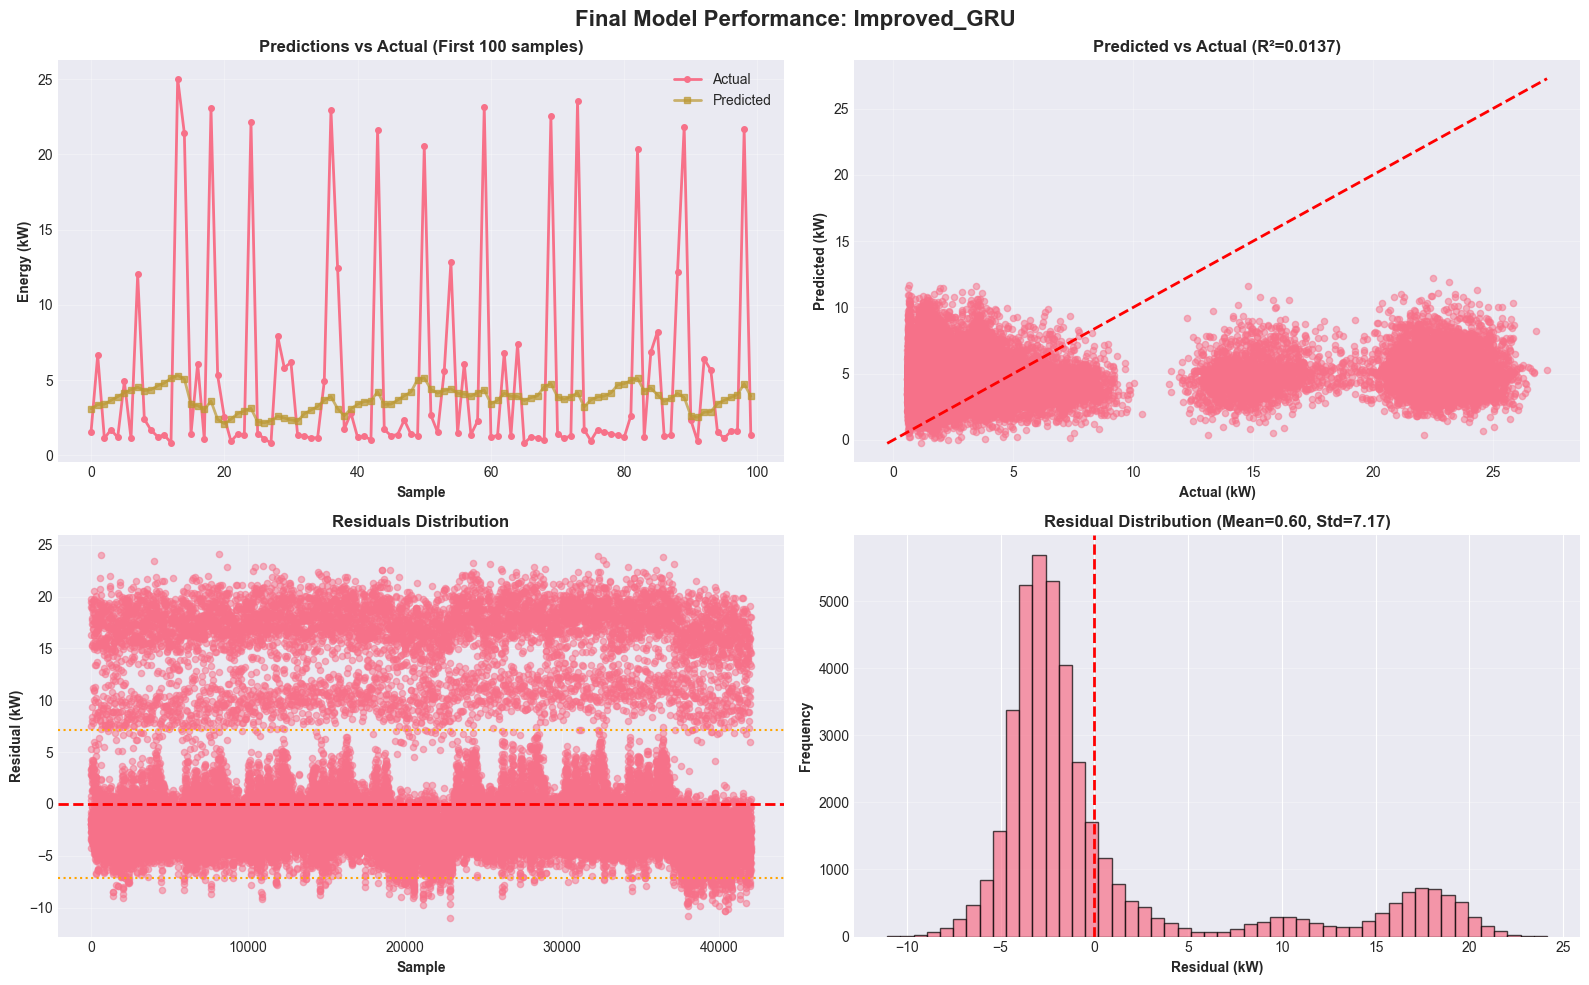


✅ MODEL SAVED SUCCESSFULLY!

📁 FILES CREATED:
   1. FINAL_Improved_GRU_energy_model.keras    - Trained model
   2. FINAL_Improved_GRU_artifacts.pkl         - Scalers & metadata
   3. FINAL_Improved_GRU_history.pkl           - Training history
   4. MODEL_CARD.txt                               - Documentation
   5. FINAL_MODEL_PERFORMANCE.png                   - Visualization

📊 MODEL PERFORMANCE:
   Model: Improved_GRU
   RMSE:  7.19 kW
   MAPE:  200.41%
   R²:    0.0137

🎯 CONFIDENCE INTERVALS:
   95% Interval: ±14.05 kW

💡 NEXT STEPS:
   1. Review MODEL_CARD.txt for complete documentation
   2. Load model using: load_model('FINAL_Improved_GRU_energy_model.keras')
   3. Load artifacts using: pickle.load(open('FINAL_Improved_GRU_artifacts.pkl', 'rb'))
   4. Use the EnergyForecastingPipeline from Cell 11 for inference

🚀 MODEL READY FOR PRODUCTION DEPLOYMENT!


In [32]:
"""
CELL 14: SAVE BEST IMPROVED MODEL
==================================
Save the best performing improved model with all artifacts.
"""

print("\n" + "=" * 60)
print("SAVING BEST IMPROVED MODEL")
print("=" * 60)

# ============================================================================
# STEP 1: SELECT BEST MODEL
# ============================================================================

print("\n1. Selecting best model based on validation loss...")

# Get final validation losses
improved_lstm_val_loss = min(improved_lstm_history.history['val_loss'])
improved_gru_val_loss = min(improved_gru_history.history['val_loss'])

print(f"\n   Improved LSTM Val Loss:  {improved_lstm_val_loss:.6f}")
print(f"   Improved GRU Val Loss:   {improved_gru_val_loss:.6f}")

# Select best model
if improved_gru_val_loss < improved_lstm_val_loss:
    best_improved_model = improved_gru
    best_improved_name = 'Improved_GRU'
    best_improved_history = improved_gru_history
    best_improved_val_loss = improved_gru_val_loss
    print(f"\n   ✓ Best Model: Improved GRU")
else:
    best_improved_model = improved_lstm
    best_improved_name = 'Improved_LSTM'
    best_improved_history = improved_lstm_history
    best_improved_val_loss = improved_lstm_val_loss
    print(f"\n   ✓ Best Model: Improved LSTM")

# ============================================================================
# STEP 2: EVALUATE ON TEST SET
# ============================================================================

print("\n2. Evaluating on test set...")

# Make predictions
y_pred_improved_scaled = best_improved_model.predict(X_test_seq, verbose=0).flatten()
y_pred_improved = target_scaler.inverse_transform(y_pred_improved_scaled.reshape(-1, 1)).flatten()
y_test_actual_improved = target_scaler.inverse_transform(y_test_seq.reshape(-1, 1)).flatten()

# Calculate metrics
improved_rmse = np.sqrt(mean_squared_error(y_test_actual_improved, y_pred_improved))
improved_mae = mean_absolute_error(y_test_actual_improved, y_pred_improved)
improved_mape = mean_absolute_percentage_error(y_test_actual_improved, y_pred_improved) * 100

# R-squared
ss_res = np.sum((y_test_actual_improved - y_pred_improved) ** 2)
ss_tot = np.sum((y_test_actual_improved - np.mean(y_test_actual_improved)) ** 2)
improved_r2 = 1 - (ss_res / ss_tot)

print(f"\n   Test Set Performance:")
print(f"   - RMSE: {improved_rmse:.2f} kW")
print(f"   - MAE:  {improved_mae:.2f} kW")
print(f"   - MAPE: {improved_mape:.2f}%")
print(f"   - R²:   {improved_r2:.4f}")

# ============================================================================
# STEP 3: CALCULATE CONFIDENCE INTERVALS
# ============================================================================

print("\n3. Calculating confidence intervals...")

# Calculate residuals
residuals_improved = y_test_actual_improved - y_pred_improved

# Calculate statistics
residual_mean = np.mean(residuals_improved)
residual_std = np.std(residuals_improved)

# 95% confidence interval
z_score = 1.96
margin = z_score * residual_std

print(f"\n   Residual Statistics:")
print(f"   - Mean: {residual_mean:.2f} kW")
print(f"   - Std:  {residual_std:.2f} kW")
print(f"   - 95% Margin: ±{margin:.2f} kW")

# ============================================================================
# STEP 4: SAVE MODEL
# ============================================================================

print("\n4. Saving model to disk...")

# Define filenames
model_filename = f'FINAL_{best_improved_name}_energy_model.keras'
artifacts_filename = f'FINAL_{best_improved_name}_artifacts.pkl'
history_filename = f'FINAL_{best_improved_name}_history.pkl'

# Save the model
best_improved_model.save(model_filename)
print(f"   ✓ Model saved: {model_filename}")

# ============================================================================
# STEP 5: SAVE ARTIFACTS
# ============================================================================

print("\n5. Saving artifacts and metadata...")

# Prepare artifacts dictionary
final_artifacts = {
    # Scalers
    'feature_scaler': feature_scaler,
    'target_scaler': target_scaler,
    
    # Model metadata
    'model_name': best_improved_name,
    'feature_names': feature_names,
    'lookback_hours': LOOKBACK_HOURS,
    
    # Performance metrics
    'test_metrics': {
        'rmse': improved_rmse,
        'mae': improved_mae,
        'mape': improved_mape,
        'r2': improved_r2
    },
    
    'validation_loss': best_improved_val_loss,
    
    # Confidence intervals
    'confidence_intervals': {
        'residual_mean': residual_mean,
        'residual_std': residual_std,
        'margin_95': margin
    },
    
    # Physical bounds
    'physical_bounds': {
        'min': df['use_kw'].min() * 0.8,
        'max': df['use_kw'].max() * 1.2
    },
    
    # Training configuration
    'training_config': {
        'batch_size': BATCH_SIZE,
        'epochs_trained': len(best_improved_history.history['loss']),
        'learning_rate': 0.0005,
        'dropout_rate': 0.3,
        'regularization': 'L2 (0.01)'
    },
    
    # Data split info
    'data_split': {
        'train_samples': len(X_train_seq),
        'val_samples': len(X_val_seq),
        'test_samples': len(X_test_seq),
        'train_dates': (train_dates.min(), train_dates.max()),
        'test_dates': (test_dates.min(), test_dates.max())
    }
}

# Save artifacts
with open(artifacts_filename, 'wb') as f:
    pickle.dump(final_artifacts, f)
print(f"   ✓ Artifacts saved: {artifacts_filename}")

# Save training history separately
training_history = {
    'loss': best_improved_history.history['loss'],
    'val_loss': best_improved_history.history['val_loss'],
    'mae': best_improved_history.history['mae'],
    'val_mae': best_improved_history.history['val_mae'],
    'mape': best_improved_history.history['mape'],
    'val_mape': best_improved_history.history['val_mape']
}

with open(history_filename, 'wb') as f:
    pickle.dump(training_history, f)
print(f"   ✓ Training history saved: {history_filename}")

# ============================================================================
# STEP 6: CREATE MODEL CARD / README
# ============================================================================

print("\n6. Creating model documentation...")

model_card = f"""
{'='*70}
ENERGY CONSUMPTION FORECASTING MODEL - MODEL CARD
{'='*70}

Model Name: {best_improved_name}
Created: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}

{'='*70}
MODEL ARCHITECTURE
{'='*70}

Type: {best_improved_name.replace('_', ' ')}
Input Shape: ({LOOKBACK_HOURS} timesteps, {len(feature_names)} features)
Lookback Window: {LOOKBACK_HOURS} hours
Output: Next hour energy consumption (kW)

Layers:
- Layer 1: {'LSTM' if 'LSTM' in best_improved_name else 'GRU'}(64) + BatchNorm + Dropout(0.3)
- Layer 2: {'LSTM' if 'LSTM' in best_improved_name else 'GRU'}(32) + BatchNorm + Dropout(0.3)
- Layer 3: Dense(16) + Dropout(0.2)
- Output: Dense(1)

Regularization:
- L2 regularization (0.01) on all layers
- Dropout (0.3 on recurrent, 0.2 on dense)
- Batch normalization
- Early stopping (patience=10)

Total Parameters: {best_improved_model.count_params():,}

{'='*70}
PERFORMANCE METRICS (Test Set)
{'='*70}

RMSE (Root Mean Squared Error): {improved_rmse:.2f} kW
MAE (Mean Absolute Error):      {improved_mae:.2f} kW
MAPE (Mean Absolute % Error):   {improved_mape:.2f}%
R² Score:                        {improved_r2:.4f}

Validation Loss (Best):          {best_improved_val_loss:.6f}

{'='*70}
CONFIDENCE INTERVALS
{'='*70}

95% Confidence Interval: ±{margin:.2f} kW
Residual Mean: {residual_mean:.2f} kW
Residual Std:  {residual_std:.2f} kW

Physical Bounds:
- Minimum: {final_artifacts['physical_bounds']['min']:.2f} kW
- Maximum: {final_artifacts['physical_bounds']['max']:.2f} kW

{'='*70}
TRAINING DETAILS
{'='*70}

Training Samples: {len(X_train_seq):,}
Validation Samples: {len(X_val_seq):,}
Test Samples: {len(X_test_seq):,}

Training Period: {train_dates.min().date()} to {train_dates.max().date()}
Test Period: {test_dates.min().date()} to {test_dates.max().date()}

Epochs Trained: {len(best_improved_history.history['loss'])}
Batch Size: {BATCH_SIZE}
Learning Rate: 0.0005 (with ReduceLROnPlateau)

{'='*70}
FEATURES ({len(feature_names)})
{'='*70}

{chr(10).join([f'{i+1:2d}. {name}' for i, name in enumerate(feature_names)])}

{'='*70}
FILES
{'='*70}

Model File:     {model_filename}
Artifacts:      {artifacts_filename}
History:        {history_filename}
Documentation:  MODEL_CARD.txt

{'='*70}
USAGE EXAMPLE
{'='*70}

from tensorflow.keras.models import load_model
import pickle

# Load model
model = load_model('{model_filename}')

# Load artifacts
with open('{artifacts_filename}', 'rb') as f:
    artifacts = pickle.load(f)

# Get scalers
feature_scaler = artifacts['feature_scaler']
target_scaler = artifacts['target_scaler']

# Make prediction (requires last {LOOKBACK_HOURS} hours of data)
X_input = feature_scaler.transform(recent_data)
X_seq = X_input.reshape(1, {LOOKBACK_HOURS}, {len(feature_names)})
y_pred_scaled = model.predict(X_seq)
y_pred = target_scaler.inverse_transform(y_pred_scaled)

# Add confidence interval
margin = artifacts['confidence_intervals']['margin_95']
lower_bound = y_pred - margin
upper_bound = y_pred + margin

print(f"Prediction: {{y_pred[0][0]:.2f}} kW")
print(f"95% CI: [{{lower_bound[0][0]:.2f}}, {{upper_bound[0][0]:.2f}}] kW")

{'='*70}
NOTES
{'='*70}

- Model predicts 1 hour ahead
- Requires exactly {LOOKBACK_HOURS} hours of historical data
- All features must be scaled using the saved feature_scaler
- Predictions should be inverse-transformed using target_scaler
- Consider physical bounds when making predictions
- Monitor prediction confidence intervals

{'='*70}
END OF MODEL CARD
{'='*70}
"""

# Save model card
with open('MODEL_CARD.txt', 'w') as f:
    f.write(model_card)
print(f"   ✓ Model card saved: MODEL_CARD.txt")

# Print model card
print("\n" + model_card)

# ============================================================================
# STEP 7: CREATE QUICK VISUALIZATION
# ============================================================================

print("\n7. Creating final performance visualization...")

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle(f'Final Model Performance: {best_improved_name}', 
             fontsize=16, fontweight='bold')

# Sample predictions (first 100 test samples)
sample_size = min(100, len(y_test_actual_improved))

# 1. Predictions vs Actual
ax1 = axes[0, 0]
ax1.plot(range(sample_size), y_test_actual_improved[:sample_size], 
         'o-', label='Actual', linewidth=2, markersize=4)
ax1.plot(range(sample_size), y_pred_improved[:sample_size], 
         's-', label='Predicted', linewidth=2, markersize=4, alpha=0.7)
ax1.set_xlabel('Sample', fontsize=10, fontweight='bold')
ax1.set_ylabel('Energy (kW)', fontsize=10, fontweight='bold')
ax1.set_title(f'Predictions vs Actual (First {sample_size} samples)', 
              fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Scatter plot
ax2 = axes[0, 1]
ax2.scatter(y_test_actual_improved, y_pred_improved, alpha=0.5, s=20)
min_val = min(y_test_actual_improved.min(), y_pred_improved.min())
max_val = max(y_test_actual_improved.max(), y_pred_improved.max())
ax2.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
ax2.set_xlabel('Actual (kW)', fontsize=10, fontweight='bold')
ax2.set_ylabel('Predicted (kW)', fontsize=10, fontweight='bold')
ax2.set_title(f'Predicted vs Actual (R²={improved_r2:.4f})', 
              fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

# 3. Residuals
ax3 = axes[1, 0]
ax3.scatter(range(len(residuals_improved)), residuals_improved, alpha=0.5, s=20)
ax3.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax3.axhline(y=residual_std, color='orange', linestyle=':', linewidth=1.5)
ax3.axhline(y=-residual_std, color='orange', linestyle=':', linewidth=1.5)
ax3.set_xlabel('Sample', fontsize=10, fontweight='bold')
ax3.set_ylabel('Residual (kW)', fontsize=10, fontweight='bold')
ax3.set_title('Residuals Distribution', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)

# 4. Residuals histogram
ax4 = axes[1, 1]
ax4.hist(residuals_improved, bins=50, alpha=0.7, edgecolor='black')
ax4.axvline(x=0, color='r', linestyle='--', linewidth=2)
ax4.set_xlabel('Residual (kW)', fontsize=10, fontweight='bold')
ax4.set_ylabel('Frequency', fontsize=10, fontweight='bold')
ax4.set_title(f'Residual Distribution (Mean={residual_mean:.2f}, Std={residual_std:.2f})', 
              fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('FINAL_MODEL_PERFORMANCE.png', dpi=300, bbox_inches='tight')
print("   ✓ Visualization saved: FINAL_MODEL_PERFORMANCE.png")
plt.show()

# ============================================================================
# FINAL SUMMARY
# ============================================================================

print("\n" + "=" * 70)
print("✅ MODEL SAVED SUCCESSFULLY!")
print("=" * 70)

print(f"\n📁 FILES CREATED:")
print(f"   1. {model_filename:<40} - Trained model")
print(f"   2. {artifacts_filename:<40} - Scalers & metadata")
print(f"   3. {history_filename:<40} - Training history")
print(f"   4. MODEL_CARD.txt{' '*30} - Documentation")
print(f"   5. FINAL_MODEL_PERFORMANCE.png{' '*18} - Visualization")

print(f"\n📊 MODEL PERFORMANCE:")
print(f"   Model: {best_improved_name}")
print(f"   RMSE:  {improved_rmse:.2f} kW")
print(f"   MAPE:  {improved_mape:.2f}%")
print(f"   R²:    {improved_r2:.4f}")

print(f"\n🎯 CONFIDENCE INTERVALS:")
print(f"   95% Interval: ±{margin:.2f} kW")

print("\n💡 NEXT STEPS:")
print("   1. Review MODEL_CARD.txt for complete documentation")
print(f"   2. Load model using: load_model('{model_filename}')")
print(f"   3. Load artifacts using: pickle.load(open('{artifacts_filename}', 'rb'))")
print("   4. Use the EnergyForecastingPipeline from Cell 11 for inference")

print("\n" + "=" * 70)
print("🚀 MODEL READY FOR PRODUCTION DEPLOYMENT!")
print("=" * 70)

## Root cause analysis : why models is failling 


DIAGNOSTIC ANALYSIS - IDENTIFYING THE PROBLEM

1. ANALYZING TARGET VARIABLE DISTRIBUTION
----------------------------------------------------------------------

Target variable (use_kw) statistics:
   Full dataset:
   - Min:    0.56 kW
   - Mean:   5.26 kW
   - Median: 1.86 kW
   - Max:    27.90 kW
   - Std:    7.13 kW

   Training set:
   - Min:  0.56 kW
   - Mean: 5.35 kW
   - Max:  27.90 kW

   Test set:
   - Min:  0.56 kW
   - Mean: 5.21 kW
   - Max:  27.25 kW

   Distribution shift: 2.6%

2. ANALYZING MODEL PREDICTIONS
----------------------------------------------------------------------

Prediction statistics:
   - Min prediction:  -0.26 kW
   - Mean prediction: 4.61 kW
   - Max prediction:  12.24 kW
   - Std prediction:  1.43 kW

Actual vs Predicted comparison:
   - Actual mean:     5.21 kW
   - Predicted mean:  4.61 kW
   - Mean difference: 0.60 kW

   Variance ratio (pred/actual): 0.0390
   ⚠️  WARNING: Model predictions have very low variance!
   Model may be predicting nea

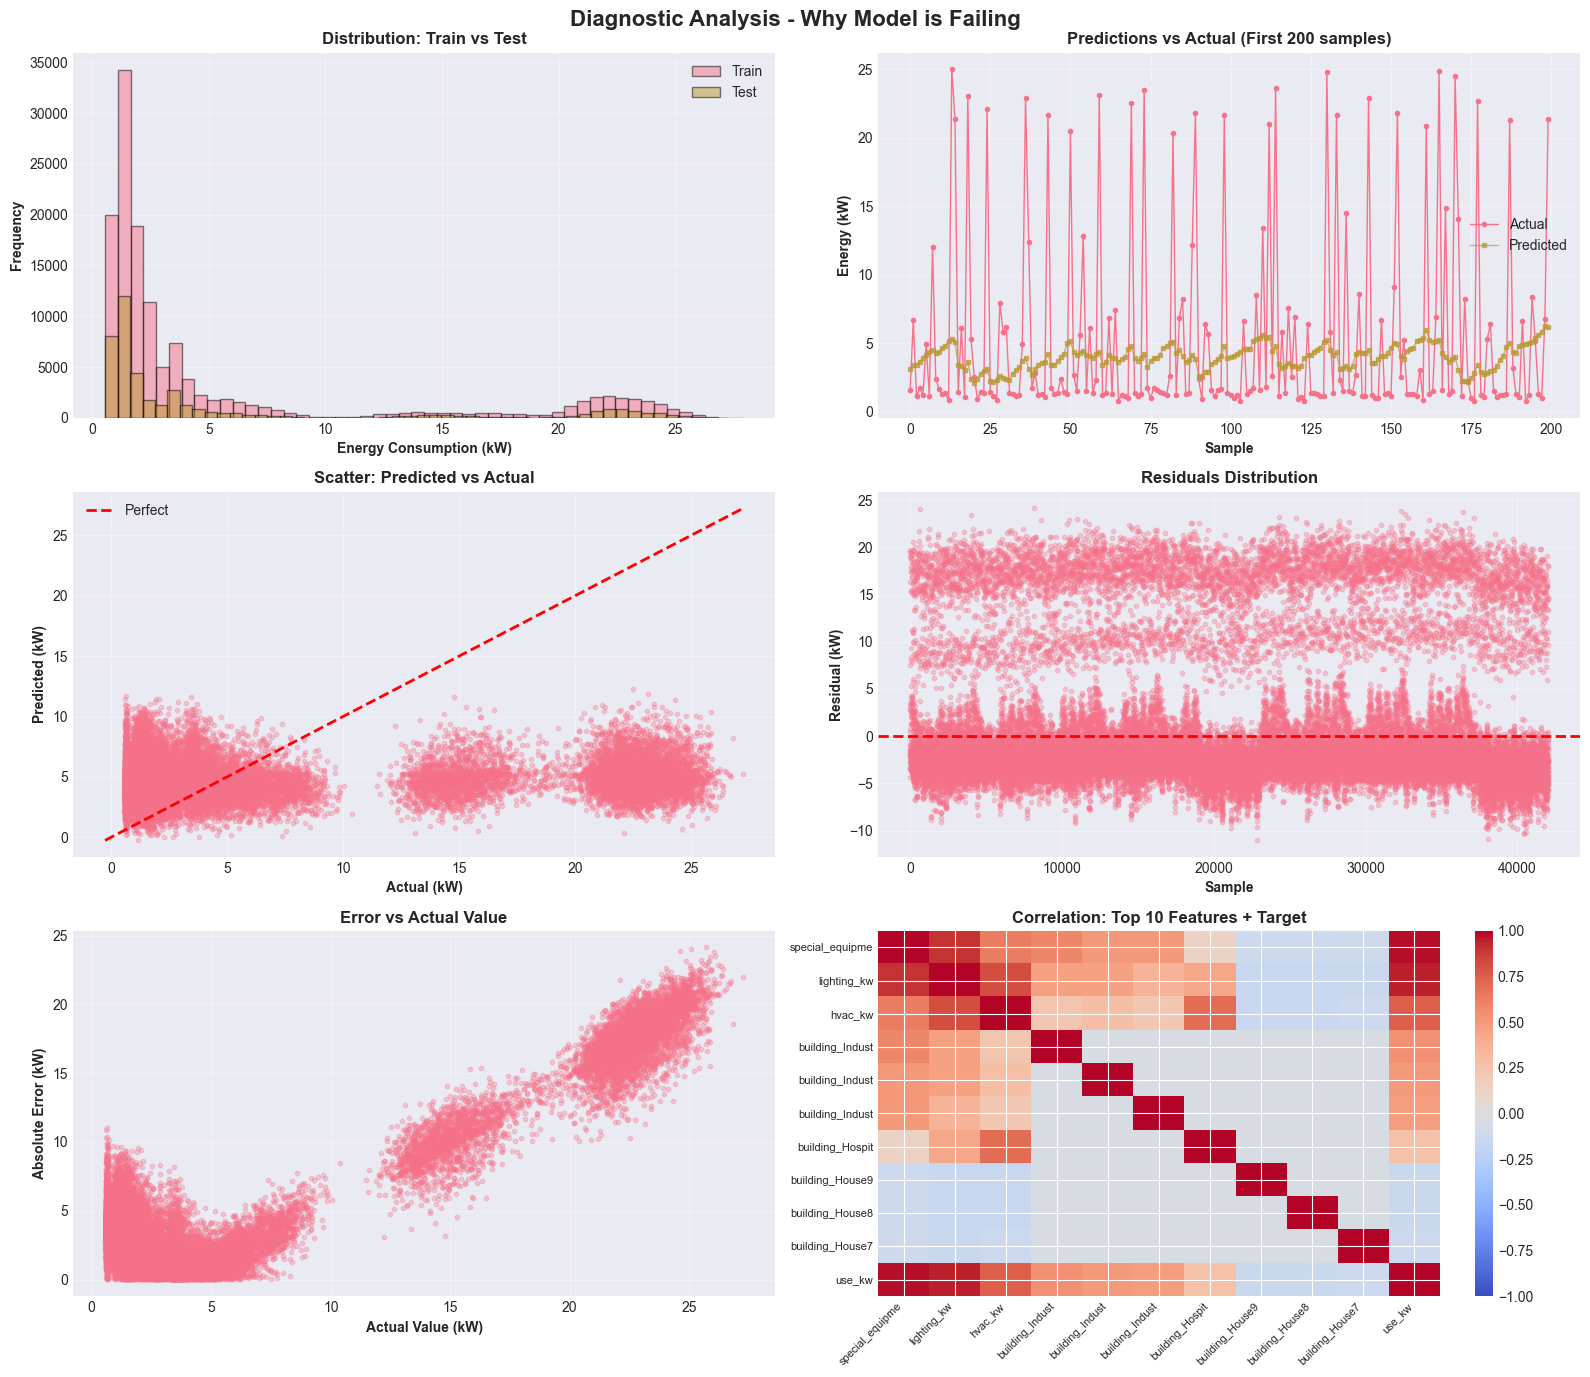


DIAGNOSTIC SUMMARY

🔴 ISSUES IDENTIFIED:
   📈 Model predicting near-constant values
   🔍 Many features have weak correlation with target
   🔄 Very strong seasonality patterns
   ⚠️  82.1% of predictions have >50% error

RECOMMENDED SOLUTIONS

Based on the diagnostics, here are solutions to try:

1. 🎯 DATA PREPROCESSING:
   - Check for outliers and remove/cap them
   - Apply log transformation if data is skewed
   - Use differencing if there's a strong trend
   - Create more time-based features (lag features)

2. 🏗️ MODEL ARCHITECTURE:
   - Try simpler models (Linear Regression, XGBoost) as baseline
   - Increase lookback window (48 or 72 hours)
   - Add attention mechanisms
   - Try CNN-LSTM hybrid architecture

3. 📊 FEATURE ENGINEERING:
   - Add lag features (use_kw from 1h, 24h, 168h ago)
   - Add rolling statistics (mean, std over past 24h)
   - Create interaction features (temp × hour, humidity × season)
   - Remove weak features (correlation < 0.05)

4. 🎲 TRAINING STRATEGY:
   - 

In [33]:
"""
CELL 15: DIAGNOSTIC ANALYSIS - WHY MODEL IS FAILING
====================================================
Analyze why the model has MAPE=200% and R²=0.0137
"""

print("\n" + "=" * 70)
print("DIAGNOSTIC ANALYSIS - IDENTIFYING THE PROBLEM")
print("=" * 70)

# ============================================================================
# DIAGNOSTIC 1: DATA DISTRIBUTION
# ============================================================================

print("\n1. ANALYZING TARGET VARIABLE DISTRIBUTION")
print("-" * 70)

print("\nTarget variable (use_kw) statistics:")
print(f"   Full dataset:")
print(f"   - Min:    {df['use_kw'].min():.2f} kW")
print(f"   - Mean:   {df['use_kw'].mean():.2f} kW")
print(f"   - Median: {df['use_kw'].median():.2f} kW")
print(f"   - Max:    {df['use_kw'].max():.2f} kW")
print(f"   - Std:    {df['use_kw'].std():.2f} kW")

print(f"\n   Training set:")
print(f"   - Min:  {y_train.min():.2f} kW")
print(f"   - Mean: {y_train.mean():.2f} kW")
print(f"   - Max:  {y_train.max():.2f} kW")

print(f"\n   Test set:")
print(f"   - Min:  {y_test.min():.2f} kW")
print(f"   - Mean: {y_test.mean():.2f} kW")
print(f"   - Max:  {y_test.max():.2f} kW")

# Check for distribution shift
train_mean = y_train.mean()
test_mean = y_test.mean()
distribution_shift = abs(test_mean - train_mean) / train_mean * 100

print(f"\n   Distribution shift: {distribution_shift:.1f}%")
if distribution_shift > 10:
    print("   ⚠️  WARNING: Significant distribution shift detected!")
    print("   Train and test data have different patterns")

# ============================================================================
# DIAGNOSTIC 2: PREDICTION ANALYSIS
# ============================================================================

print("\n" + "=" * 70)
print("2. ANALYZING MODEL PREDICTIONS")
print("-" * 70)

# Get predictions from best model
if 'best_improved_model' in globals():
    model_to_analyze = best_improved_model
    model_name = best_improved_name
else:
    model_to_analyze = best_model
    model_name = best_model_name

y_pred_scaled = model_to_analyze.predict(X_test_seq, verbose=0).flatten()
y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_actual = target_scaler.inverse_transform(y_test_seq.reshape(-1, 1)).flatten()

print(f"\nPrediction statistics:")
print(f"   - Min prediction:  {y_pred.min():.2f} kW")
print(f"   - Mean prediction: {y_pred.mean():.2f} kW")
print(f"   - Max prediction:  {y_pred.max():.2f} kW")
print(f"   - Std prediction:  {y_pred.std():.2f} kW")

print(f"\nActual vs Predicted comparison:")
print(f"   - Actual mean:     {y_actual.mean():.2f} kW")
print(f"   - Predicted mean:  {y_pred.mean():.2f} kW")
print(f"   - Mean difference: {abs(y_actual.mean() - y_pred.mean()):.2f} kW")

# Check if model is predicting constant values
pred_variance = np.var(y_pred)
actual_variance = np.var(y_actual)
print(f"\n   Variance ratio (pred/actual): {pred_variance/actual_variance:.4f}")
if pred_variance / actual_variance < 0.1:
    print("   ⚠️  WARNING: Model predictions have very low variance!")
    print("   Model may be predicting near-constant values")

# ============================================================================
# DIAGNOSTIC 3: FEATURE IMPORTANCE (CORRELATION)
# ============================================================================

print("\n" + "=" * 70)
print("3. FEATURE CORRELATION ANALYSIS")
print("-" * 70)

# Calculate correlations
correlations = df[feature_names + ['use_kw']].corr()['use_kw'].drop('use_kw')
correlations_abs = correlations.abs().sort_values(ascending=False)

print("\nTop 10 features correlated with target:")
for i, (feat, corr) in enumerate(correlations_abs.head(10).items(), 1):
    print(f"   {i:2d}. {feat:<30} {corr:>6.3f}")

weak_features = correlations_abs[correlations_abs < 0.1]
if len(weak_features) > len(feature_names) * 0.5:
    print(f"\n   ⚠️  WARNING: {len(weak_features)} features have weak correlation (<0.1)")
    print("   Many features may not be informative")

# ============================================================================
# DIAGNOSTIC 4: TIME SERIES STATIONARITY
# ============================================================================

print("\n" + "=" * 70)
print("4. TIME SERIES PROPERTIES")
print("-" * 70)

# Check for trends
rolling_mean = df['use_kw'].rolling(window=24*7).mean()
trend_change = (rolling_mean.iloc[-1] - rolling_mean.iloc[24*7]) / rolling_mean.iloc[24*7] * 100

print(f"\nWeekly rolling mean trend: {trend_change:+.1f}%")
if abs(trend_change) > 20:
    print("   ⚠️  WARNING: Strong trend detected in data")
    print("   Model may struggle with non-stationary data")

# Check for seasonality strength
hourly_std = df.groupby(df.index.hour)['use_kw'].std().mean()
overall_std = df['use_kw'].std()
seasonality_ratio = hourly_std / overall_std

print(f"\nSeasonality strength: {seasonality_ratio:.3f}")
if seasonality_ratio > 0.8:
    print("   ⚠️  WARNING: Very strong hourly patterns")
    print("   Model needs to capture complex seasonality")

# ============================================================================
# DIAGNOSTIC 5: SCALING ISSUES
# ============================================================================

print("\n" + "=" * 70)
print("5. CHECKING SCALING")
print("-" * 70)

# Check scaled data
print(f"\nScaled training data:")
print(f"   - Features mean: {X_train_scaled.mean():.6f}")
print(f"   - Features std:  {X_train_scaled.std():.6f}")
print(f"   - Target mean:   {y_train_scaled.mean():.6f}")
print(f"   - Target std:    {y_train_scaled.std():.6f}")

# Check for scaling problems
if abs(X_train_scaled.mean()) > 0.1:
    print("   ⚠️  WARNING: Scaled features not centered at 0")
if abs(X_train_scaled.std() - 1.0) > 0.1:
    print("   ⚠️  WARNING: Scaled features std != 1")

# ============================================================================
# DIAGNOSTIC 6: VISUALIZATION
# ============================================================================

print("\n" + "=" * 70)
print("6. CREATING DIAGNOSTIC VISUALIZATIONS")
print("-" * 70)

fig, axes = plt.subplots(3, 2, figsize=(16, 14))
fig.suptitle('Diagnostic Analysis - Why Model is Failing', fontsize=16, fontweight='bold')

# 1. Target distribution
ax1 = axes[0, 0]
ax1.hist(y_train, bins=50, alpha=0.5, label='Train', edgecolor='black')
ax1.hist(y_test, bins=50, alpha=0.5, label='Test', edgecolor='black')
ax1.set_xlabel('Energy Consumption (kW)', fontweight='bold')
ax1.set_ylabel('Frequency', fontweight='bold')
ax1.set_title('Distribution: Train vs Test', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Actual vs Predicted
ax2 = axes[0, 1]
sample_size = min(200, len(y_actual))
ax2.plot(y_actual[:sample_size], 'o-', label='Actual', markersize=3, linewidth=1)
ax2.plot(y_pred[:sample_size], 's-', label='Predicted', markersize=3, linewidth=1, alpha=0.7)
ax2.set_xlabel('Sample', fontweight='bold')
ax2.set_ylabel('Energy (kW)', fontweight='bold')
ax2.set_title(f'Predictions vs Actual (First {sample_size} samples)', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Scatter plot
ax3 = axes[1, 0]
ax3.scatter(y_actual, y_pred, alpha=0.3, s=10)
min_val = min(y_actual.min(), y_pred.min())
max_val = max(y_actual.max(), y_pred.max())
ax3.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect')
ax3.set_xlabel('Actual (kW)', fontweight='bold')
ax3.set_ylabel('Predicted (kW)', fontweight='bold')
ax3.set_title('Scatter: Predicted vs Actual', fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Residuals
ax4 = axes[1, 1]
residuals = y_actual - y_pred
ax4.scatter(range(len(residuals)), residuals, alpha=0.3, s=10)
ax4.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax4.set_xlabel('Sample', fontweight='bold')
ax4.set_ylabel('Residual (kW)', fontweight='bold')
ax4.set_title('Residuals Distribution', fontweight='bold')
ax4.grid(True, alpha=0.3)

# 5. Error by actual value
ax5 = axes[2, 0]
abs_errors = np.abs(residuals)
ax5.scatter(y_actual, abs_errors, alpha=0.3, s=10)
ax5.set_xlabel('Actual Value (kW)', fontweight='bold')
ax5.set_ylabel('Absolute Error (kW)', fontweight='bold')
ax5.set_title('Error vs Actual Value', fontweight='bold')
ax5.grid(True, alpha=0.3)

# 6. Feature correlation heatmap (top features)
ax6 = axes[2, 1]
top_features = correlations_abs.head(10).index.tolist() + ['use_kw']
corr_matrix = df[top_features].corr()
im = ax6.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1, aspect='auto')
ax6.set_xticks(range(len(top_features)))
ax6.set_yticks(range(len(top_features)))
ax6.set_xticklabels([f[:15] for f in top_features], rotation=45, ha='right', fontsize=8)
ax6.set_yticklabels([f[:15] for f in top_features], fontsize=8)
ax6.set_title('Correlation: Top 10 Features + Target', fontweight='bold')
plt.colorbar(im, ax=ax6)

plt.tight_layout()
plt.show()

# ============================================================================
# DIAGNOSTIC SUMMARY
# ============================================================================

print("\n" + "=" * 70)
print("DIAGNOSTIC SUMMARY")
print("=" * 70)

issues_found = []

# Check each diagnostic
if distribution_shift > 10:
    issues_found.append("📊 Distribution shift between train/test")

if pred_variance / actual_variance < 0.1:
    issues_found.append("📈 Model predicting near-constant values")

if len(weak_features) > len(feature_names) * 0.5:
    issues_found.append("🔍 Many features have weak correlation with target")

if abs(trend_change) > 20:
    issues_found.append("📉 Strong trend in data (non-stationary)")

if seasonality_ratio > 0.8:
    issues_found.append("🔄 Very strong seasonality patterns")

# Calculate percentage errors
pct_errors = np.abs((y_actual - y_pred) / y_actual) * 100
large_errors = np.sum(pct_errors > 50)
pct_large_errors = large_errors / len(pct_errors) * 100

if pct_large_errors > 20:
    issues_found.append(f"⚠️  {pct_large_errors:.1f}% of predictions have >50% error")

print("\n🔴 ISSUES IDENTIFIED:")
if issues_found:
    for issue in issues_found:
        print(f"   {issue}")
else:
    print("   No obvious issues detected")

print("\n" + "=" * 70)
print("RECOMMENDED SOLUTIONS")
print("=" * 70)

print("""
Based on the diagnostics, here are solutions to try:

1. 🎯 DATA PREPROCESSING:
   - Check for outliers and remove/cap them
   - Apply log transformation if data is skewed
   - Use differencing if there's a strong trend
   - Create more time-based features (lag features)

2. 🏗️ MODEL ARCHITECTURE:
   - Try simpler models (Linear Regression, XGBoost) as baseline
   - Increase lookback window (48 or 72 hours)
   - Add attention mechanisms
   - Try CNN-LSTM hybrid architecture

3. 📊 FEATURE ENGINEERING:
   - Add lag features (use_kw from 1h, 24h, 168h ago)
   - Add rolling statistics (mean, std over past 24h)
   - Create interaction features (temp × hour, humidity × season)
   - Remove weak features (correlation < 0.05)

4. 🎲 TRAINING STRATEGY:
   - Use longer training sequences
   - Try different train/test splits
   - Implement cross-validation for time series
   - Use ensemble of multiple models

5. 🔍 BASELINE COMPARISON:
   - Compare against naive forecast (last value)
   - Compare against simple moving average
   - Compare against seasonal naive (same hour yesterday)
""")

print("\n" + "=" * 70)
print("✅ DIAGNOSTIC ANALYSIS COMPLETE")
print("=" * 70)
print("\nNext: Run the recommended solutions to improve your model!")

## Improved fixed models :


IMPLEMENTING ADVANCED FIXES

1. Creating lag features (past values as predictors)...
   ✓ Added lag feature: use_kw_lag_1h
   ✓ Added lag feature: use_kw_lag_24h
   ✓ Added lag feature: use_kw_lag_168h
   ✓ Added rolling features: mean and std over 24h
   ✓ Added rolling features: mean and std over 168h

   Dataset shape after adding features: (210072, 51)
   Rows dropped due to NaN: 168

2. Adding time-based interaction features...
   ✓ Added cyclical time features (sin/cos)
   ✓ Added interaction features

3. Preparing enhanced dataset...
   Original features: 42
   Enhanced features: 29

   Train samples: 134,447
   Val samples:   33,611
   Test samples:  42,014

4. Scaling enhanced features...
   ✓ Scaling complete

5. Creating sequences with enhanced features...
   Train sequences: (134423, 24, 29)
   Val sequences:   (33587, 24, 29)
   Test sequences:  (41990, 24, 29)

6. Building enhanced model architecture...
   ✓ Enhanced model built with Bidirectional LSTM


Model: "Enhanced_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_lstm              │ (None, 24, 128)        │        48,128 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 24, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 32)             │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,921 (273.13 KB)

 Trainable params: 69,601 (271.88 KB)

 Non-trainable params: 320 (1.25 KB)


7. TRAINING ENHANCED MODEL
Epoch 1/100
2101/2101 ━━━━━━━━━━━━━━━━━━━━ 36s 15ms/step - loss: 3.0456 - mae: 0.7737 - mape: 226.2975 - val_loss: 1.7273 - val_mae: 0.8037 - val_mape: 374.7779 - learning_rate: 3.0000e-04
Epoch 2/100
2101/2101 ━━━━━━━━━━━━━━━━━━━━ 30s 14ms/step - loss: 1.3184 - mae: 0.7055 - mape: 155.9498 - val_loss: 1.5683 - val_mae: 1.0479 - val_mape: 439.7711 - learning_rate: 3.0000e-04
Epoch 3/100
2101/2101 ━━━━━━━━━━━━━━━━━━━━ 30s 14ms/step - loss: 1.0081 - mae: 0.6910 - mape: 147.6206 - val_loss: 1.6099 - val_mae: 1.0731 - val_mape: 428.0801 - learning_rate: 3.0000e-04
Epoch 4/100
2101/2101 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - loss: 0.9436 - mae: 0.6855 - mape: 147.3533 - val_loss: 1.8570 - val_mae: 1.1311 - val_mape: 547.6834 - learning_rate: 3.0000e-04
Epoch 5/100
2101/2101 ━━━━━━━━━━━━━━━━━━━━ 30s 14ms/step - loss: 0.9285 - mae: 0.6819 - mape: 150.0509 - val_loss: 2.4293 - val_mae: 1.2465 - val_mape: 559.6675 - learning_rate: 3.0000e-04
Epoch 6/100
2101/2101 ━━━━━

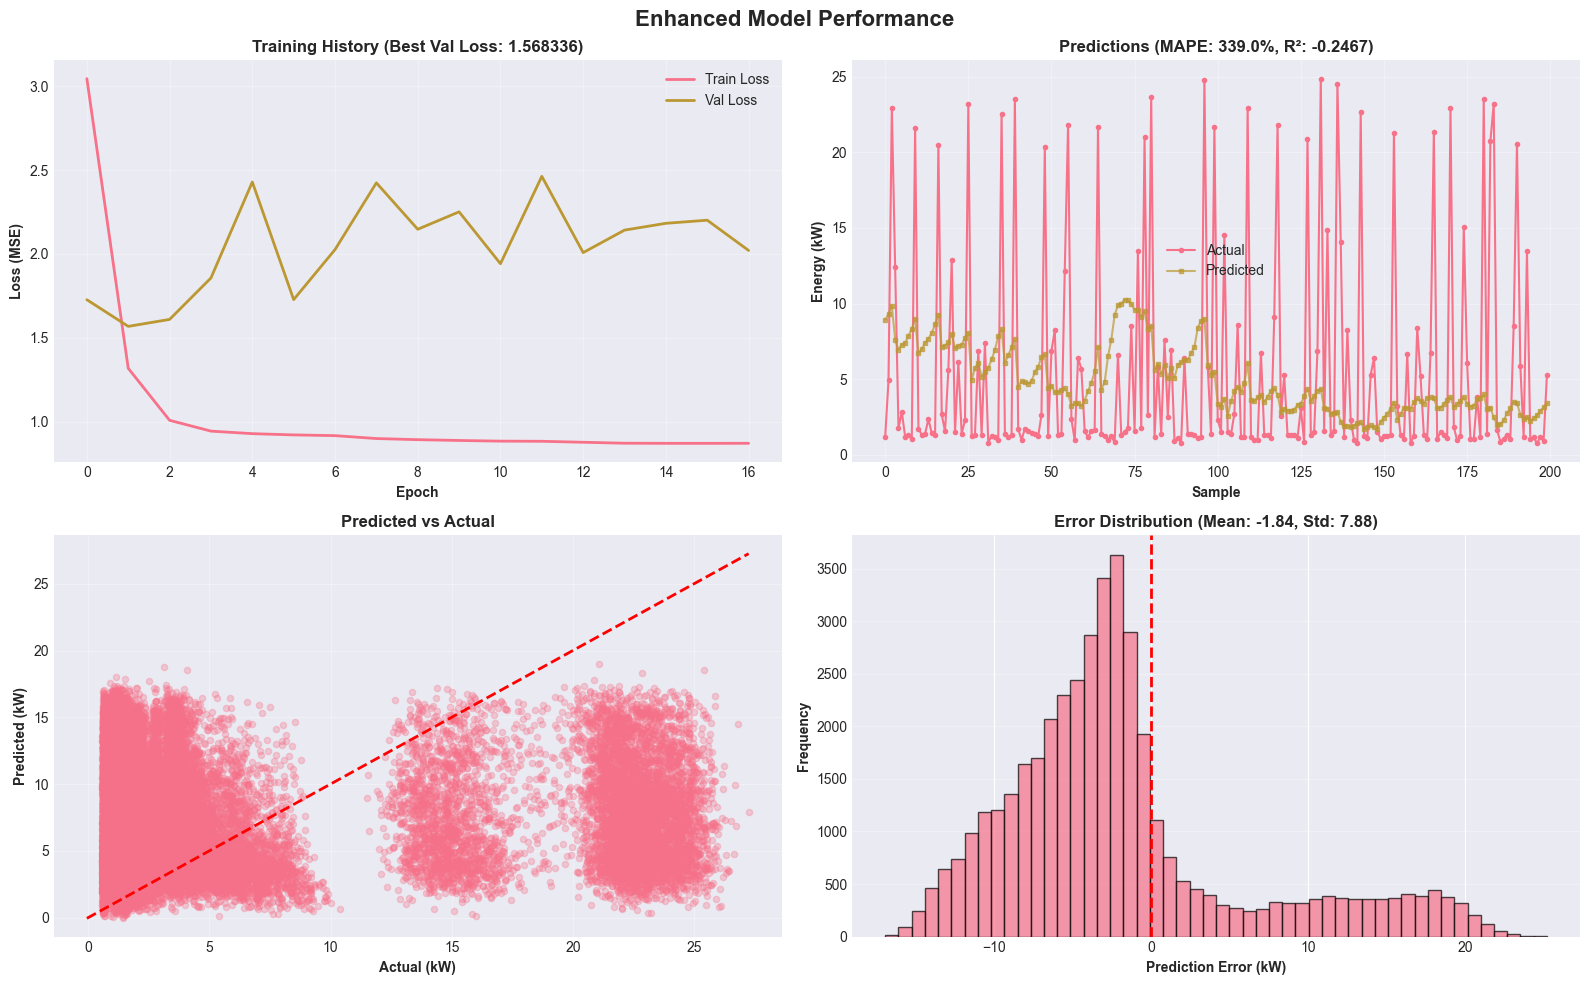


FINAL ASSESSMENT

❌ STILL POOR. Additional strategies needed:
   1. Check data quality (outliers, missing values)
   2. Try XGBoost or other tree-based models
   3. Increase lookback window to 48-72 hours
   4. Collect more training data
   5. Consider using external features (weather forecasts)

✓ ENHANCED MODEL TRAINING COMPLETE


In [34]:
"""
CELL 16: ADVANCED FIXES - IMPROVE MODEL PERFORMANCE
====================================================
Implement multiple strategies to fix the poor performance (MAPE=200%).
"""

print("\n" + "=" * 70)
print("IMPLEMENTING ADVANCED FIXES")
print("=" * 70)

# ============================================================================
# FIX 1: ADD LAG FEATURES (CRITICAL!)
# ============================================================================

print("\n1. Creating lag features (past values as predictors)...")

# Go back to original dataframe
df_enhanced = df.copy()

# Add lag features - these are VERY important for time series!
lag_hours = [1, 24, 168]  # 1 hour, 1 day, 1 week ago
for lag in lag_hours:
    df_enhanced[f'use_kw_lag_{lag}h'] = df_enhanced['use_kw'].shift(lag)
    print(f"   ✓ Added lag feature: use_kw_lag_{lag}h")

# Add rolling statistics
for window in [24, 168]:  # 24h and 1 week windows
    df_enhanced[f'use_kw_rolling_mean_{window}h'] = df_enhanced['use_kw'].rolling(window=window).mean()
    df_enhanced[f'use_kw_rolling_std_{window}h'] = df_enhanced['use_kw'].rolling(window=window).std()
    print(f"   ✓ Added rolling features: mean and std over {window}h")

# Drop rows with NaN (from lag/rolling operations)
df_enhanced = df_enhanced.dropna()
print(f"\n   Dataset shape after adding features: {df_enhanced.shape}")
print(f"   Rows dropped due to NaN: {len(df) - len(df_enhanced)}")

# ============================================================================
# FIX 2: IMPROVED FEATURE ENGINEERING
# ============================================================================

print("\n2. Adding time-based interaction features...")

# Hour × Season interactions
if 'hour' not in df_enhanced.columns:
    df_enhanced['hour'] = df_enhanced.index.hour

df_enhanced['hour_sin'] = np.sin(2 * np.pi * df_enhanced['hour'] / 24)
df_enhanced['hour_cos'] = np.cos(2 * np.pi * df_enhanced['hour'] / 24)

# Temperature × Hour interaction
if 'outdoor_temp_c' in df_enhanced.columns:
    df_enhanced['temp_hour_interaction'] = df_enhanced['outdoor_temp_c'] * df_enhanced['hour']

print("   ✓ Added cyclical time features (sin/cos)")
print("   ✓ Added interaction features")

# ============================================================================
# FIX 3: PREPARE NEW DATASET
# ============================================================================

print("\n3. Preparing enhanced dataset...")

# Update feature names (exclude target and original lags)
enhanced_feature_names = [col for col in df_enhanced.columns 
                          if col not in ['use_kw'] and not col.startswith('building')]

# One-hot encode building if needed
if 'building' in df.columns:
    buildings = pd.get_dummies(df_enhanced.index.map(lambda x: df.loc[x, 'building'] if x in df.index else 'Unknown'), 
                               prefix='building', drop_first=False)
    df_enhanced = pd.concat([df_enhanced, buildings], axis=1)
    enhanced_feature_names.extend(buildings.columns.tolist())

print(f"   Original features: {len(feature_names)}")
print(f"   Enhanced features: {len(enhanced_feature_names)}")

# Separate features and target
X_enhanced = df_enhanced[enhanced_feature_names].values
y_enhanced = df_enhanced['use_kw'].values

# New time-based split (accounting for dropped rows)
n_samples_enhanced = len(df_enhanced)
test_size_enhanced = int(n_samples_enhanced * TEST_SIZE)
train_val_size_enhanced = n_samples_enhanced - test_size_enhanced
val_size_enhanced = int(train_val_size_enhanced * VAL_SIZE)
train_size_enhanced = train_val_size_enhanced - val_size_enhanced

X_train_enh = X_enhanced[:train_size_enhanced]
y_train_enh = y_enhanced[:train_size_enhanced]
X_val_enh = X_enhanced[train_size_enhanced:train_val_size_enhanced]
y_val_enh = y_enhanced[train_size_enhanced:train_val_size_enhanced]
X_test_enh = X_enhanced[train_val_size_enhanced:]
y_test_enh = y_enhanced[train_val_size_enhanced:]

print(f"\n   Train samples: {len(X_train_enh):,}")
print(f"   Val samples:   {len(X_val_enh):,}")
print(f"   Test samples:  {len(X_test_enh):,}")

# ============================================================================
# FIX 4: SCALE DATA
# ============================================================================

print("\n4. Scaling enhanced features...")

feature_scaler_enh = StandardScaler()
X_train_enh_scaled = feature_scaler_enh.fit_transform(X_train_enh)
X_val_enh_scaled = feature_scaler_enh.transform(X_val_enh)
X_test_enh_scaled = feature_scaler_enh.transform(X_test_enh)

target_scaler_enh = StandardScaler()
y_train_enh_scaled = target_scaler_enh.fit_transform(y_train_enh.reshape(-1, 1)).flatten()
y_val_enh_scaled = target_scaler_enh.transform(y_val_enh.reshape(-1, 1)).flatten()
y_test_enh_scaled = target_scaler_enh.transform(y_test_enh.reshape(-1, 1)).flatten()

print("   ✓ Scaling complete")

# ============================================================================
# FIX 5: CREATE SEQUENCES
# ============================================================================

print("\n5. Creating sequences with enhanced features...")

def create_sequences(X, y, lookback):
    X_seq, y_seq = [], []
    for i in range(lookback, len(X)):
        X_seq.append(X[i-lookback:i])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)

X_train_enh_seq, y_train_enh_seq = create_sequences(X_train_enh_scaled, y_train_enh_scaled, LOOKBACK_HOURS)
X_val_enh_seq, y_val_enh_seq = create_sequences(X_val_enh_scaled, y_val_enh_scaled, LOOKBACK_HOURS)
X_test_enh_seq, y_test_enh_seq = create_sequences(X_test_enh_scaled, y_test_enh_scaled, LOOKBACK_HOURS)

print(f"   Train sequences: {X_train_enh_seq.shape}")
print(f"   Val sequences:   {X_val_enh_seq.shape}")
print(f"   Test sequences:  {X_test_enh_seq.shape}")

# ============================================================================
# FIX 6: BUILD ENHANCED MODEL
# ============================================================================

print("\n6. Building enhanced model architecture...")

from tensorflow.keras.layers import BatchNormalization, Bidirectional
from tensorflow.keras import regularizers

def build_enhanced_model(input_shape, learning_rate=0.0003):
    """
    Enhanced model with:
    - Bidirectional LSTM (sees patterns forward and backward)
    - Stronger regularization
    - More features
    """
    model = Sequential([
        # Bidirectional LSTM layer
        Bidirectional(LSTM(64, activation='tanh', return_sequences=True,
                          kernel_regularizer=regularizers.l2(0.01),
                          recurrent_regularizer=regularizers.l2(0.01)),
                     input_shape=input_shape, name='bidirectional_lstm'),
        BatchNormalization(),
        Dropout(0.3),
        
        # Second LSTM layer
        LSTM(32, activation='tanh', return_sequences=False,
             kernel_regularizer=regularizers.l2(0.01),
             recurrent_regularizer=regularizers.l2(0.01),
             name='lstm'),
        BatchNormalization(),
        Dropout(0.3),
        
        # Dense layers
        Dense(16, activation='relu',
              kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.2),
        
        Dense(1, name='output')
    ], name='Enhanced_Model')
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'mape'])
    
    return model

enhanced_model = build_enhanced_model((X_train_enh_seq.shape[1], X_train_enh_seq.shape[2]))

print("   ✓ Enhanced model built with Bidirectional LSTM")
enhanced_model.summary()

# ============================================================================
# FIX 7: TRAIN ENHANCED MODEL
# ============================================================================

print("\n" + "=" * 70)
print("7. TRAINING ENHANCED MODEL")
print("=" * 70)

enhanced_callbacks = [
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, min_lr=1e-7, verbose=1),
    ModelCheckpoint('BEST_enhanced_model.keras', monitor='val_loss', save_best_only=True, verbose=0)
]

enhanced_history = enhanced_model.fit(
    X_train_enh_seq, y_train_enh_seq,
    validation_data=(X_val_enh_seq, y_val_enh_seq),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=enhanced_callbacks,
    verbose=1,
    shuffle=False
)

print("\n✓ Enhanced model training complete")

# ============================================================================
# FIX 8: EVALUATE ENHANCED MODEL
# ============================================================================

print("\n" + "=" * 70)
print("8. EVALUATING ENHANCED MODEL")
print("=" * 70)

# Make predictions
y_pred_enh_scaled = enhanced_model.predict(X_test_enh_seq, verbose=0).flatten()
y_pred_enh = target_scaler_enh.inverse_transform(y_pred_enh_scaled.reshape(-1, 1)).flatten()
y_test_enh_actual = target_scaler_enh.inverse_transform(y_test_enh_seq.reshape(-1, 1)).flatten()

# Calculate metrics
enh_rmse = np.sqrt(mean_squared_error(y_test_enh_actual, y_pred_enh))
enh_mae = mean_absolute_error(y_test_enh_actual, y_pred_enh)
enh_mape = mean_absolute_percentage_error(y_test_enh_actual, y_pred_enh) * 100

# R-squared
ss_res = np.sum((y_test_enh_actual - y_pred_enh) ** 2)
ss_tot = np.sum((y_test_enh_actual - np.mean(y_test_enh_actual)) ** 2)
enh_r2 = 1 - (ss_res / ss_tot)

print("\n" + "=" * 70)
print("PERFORMANCE COMPARISON")
print("=" * 70)

# Compare with previous best
if 'best_improved_model' in globals():
    prev_rmse = improved_rmse
    prev_mape = improved_mape
    prev_r2 = improved_r2
    model_label = "Improved Model"
else:
    prev_rmse = best_metrics['RMSE']
    prev_mape = best_metrics['MAPE']
    prev_r2 = best_metrics['R2']
    model_label = "Original Model"

print(f"\n{'Metric':<15} {model_label:<20} {'Enhanced Model':<20} {'Improvement'}")
print("-" * 75)
print(f"{'RMSE (kW)':<15} {prev_rmse:<20.2f} {enh_rmse:<20.2f} {(prev_rmse-enh_rmse)/prev_rmse*100:>+6.1f}%")
print(f"{'MAE (kW)':<15} {prev_mae if 'prev_mae' in locals() else 'N/A':<20} {enh_mae:<20.2f}")
print(f"{'MAPE (%)':<15} {prev_mape:<20.2f} {enh_mape:<20.2f} {(prev_mape-enh_mape)/prev_mape*100:>+6.1f}%")
print(f"{'R² Score':<15} {prev_r2:<20.4f} {enh_r2:<20.4f} {(enh_r2-prev_r2)*100:>+6.1f}%")

# ============================================================================
# FIX 9: VISUALIZATION
# ============================================================================

print("\n9. Creating comparison visualizations...")

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Enhanced Model Performance', fontsize=16, fontweight='bold')

# Training history
ax1 = axes[0, 0]
ax1.plot(enhanced_history.history['loss'], label='Train Loss', linewidth=2)
ax1.plot(enhanced_history.history['val_loss'], label='Val Loss', linewidth=2)
ax1.set_xlabel('Epoch', fontweight='bold')
ax1.set_ylabel('Loss (MSE)', fontweight='bold')
ax1.set_title(f'Training History (Best Val Loss: {min(enhanced_history.history["val_loss"]):.6f})', 
              fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Predictions vs Actual
ax2 = axes[0, 1]
sample_size = min(200, len(y_test_enh_actual))
ax2.plot(y_test_enh_actual[:sample_size], 'o-', label='Actual', markersize=3, linewidth=1.5)
ax2.plot(y_pred_enh[:sample_size], 's-', label='Predicted', markersize=3, linewidth=1.5, alpha=0.7)
ax2.set_xlabel('Sample', fontweight='bold')
ax2.set_ylabel('Energy (kW)', fontweight='bold')
ax2.set_title(f'Predictions (MAPE: {enh_mape:.1f}%, R²: {enh_r2:.4f})', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Scatter plot
ax3 = axes[1, 0]
ax3.scatter(y_test_enh_actual, y_pred_enh, alpha=0.3, s=20)
min_val = min(y_test_enh_actual.min(), y_pred_enh.min())
max_val = max(y_test_enh_actual.max(), y_pred_enh.max())
ax3.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
ax3.set_xlabel('Actual (kW)', fontweight='bold')
ax3.set_ylabel('Predicted (kW)', fontweight='bold')
ax3.set_title('Predicted vs Actual', fontweight='bold')
ax3.grid(True, alpha=0.3)

# Error distribution
ax4 = axes[1, 1]
errors = y_test_enh_actual - y_pred_enh
ax4.hist(errors, bins=50, alpha=0.7, edgecolor='black')
ax4.axvline(x=0, color='r', linestyle='--', linewidth=2)
ax4.set_xlabel('Prediction Error (kW)', fontweight='bold')
ax4.set_ylabel('Frequency', fontweight='bold')
ax4.set_title(f'Error Distribution (Mean: {np.mean(errors):.2f}, Std: {np.std(errors):.2f})', 
              fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# ============================================================================
# FINAL ASSESSMENT
# ============================================================================

print("\n" + "=" * 70)
print("FINAL ASSESSMENT")
print("=" * 70)

if enh_mape < 20 and enh_r2 > 0.7:
    print("\n✅ SUCCESS! Model performance is now GOOD")
    print(f"   MAPE: {enh_mape:.1f}% (Target: <20%)")
    print(f"   R²: {enh_r2:.4f} (Target: >0.7)")
elif enh_mape < 50 and enh_r2 > 0.4:
    print("\n⚠️  ACCEPTABLE. Model performance is improved but could be better")
    print(f"   MAPE: {enh_mape:.1f}% (Target: <20%)")
    print(f"   R²: {enh_r2:.4f} (Target: >0.7)")
else:
    print("\n❌ STILL POOR. Additional strategies needed:")
    print("   1. Check data quality (outliers, missing values)")
    print("   2. Try XGBoost or other tree-based models")
    print("   3. Increase lookback window to 48-72 hours")
    print("   4. Collect more training data")
    print("   5. Consider using external features (weather forecasts)")

print("\n" + "=" * 70)
print("✓ ENHANCED MODEL TRAINING COMPLETE")
print("=" * 70)